In [1]:
import mdtraj as md
import numpy as np
#import nglview

In [2]:
# Convert .nc file to .h5 file in terminal
# mdconvert -o center.h5 -s 1 -t solvated_2jv1.prmtop center1.nc
t=md.load('data1/center.h5', top='solvated_2jv1.prmtop')
t.superpose(t, 0)

/home/shivaniv/anaconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


<mdtraj.Trajectory with 22866 frames, 13519 atoms, 4292 residues, and unitcells at 0x7fda5b1d4f10>

In [3]:
nmr_av_traj=md.load('../hi/setup/2jv1_original_av.pdb')

In [4]:
protein_sel1=t.topology.select('protein')
traj2=t.atom_slice(protein_sel1)

In [5]:
topology_prot=traj2.topology
print(topology_prot)
#print('All atoms: %s' % [atom for atom in topology_prot.atoms])

<mdtraj.Topology with 1 chains, 50 residues, 770 atoms, 780 bonds>


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from contact_map import ContactFrequency, ContactDifference

In [7]:
%%time
frame_contacts=ContactFrequency(t[0])

CPU times: user 176 ms, sys: 2.16 ms, total: 178 ms
Wall time: 189 ms


/home/shivaniv/anaconda3/lib/python3.11/site-packages/contact_map/contact_count.py:176: RuntimeWarning: The number of pixels in the figure is insufficient to show all the contacts.
 Please save this as a vector image (such as a PDF) to view the correct result.
 Another option is to increase the 'dpi' (currently: 100.0), or the 'figsize' (currently: (6.4, 4.8)).
 Recommended minimum amount of pixels = (4292, 4292) (width, height).
  warnings.warn(msg, RuntimeWarning)


CPU times: user 206 ms, sys: 508 µs, total: 206 ms
Wall time: 788 ms


(0.0, 51.0)

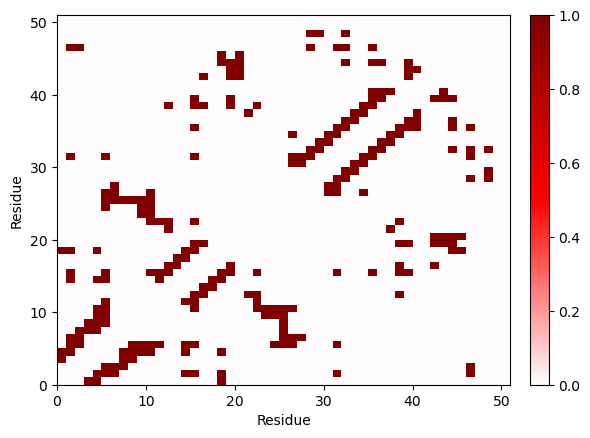

In [8]:
%%time
fig,ax=frame_contacts.residue_contacts.plot()
plt.xlabel("Residue")
_=plt.ylabel("Residue")
plt.xlim(0,51)
plt.ylim(0,51)

In [9]:
%%time
# This will print total wall time taken for the execution
# Here, it will take ~3 min to execute
# Whenever we use %%time, it should be first line of the code. Don't 
# even add any comment before it.
traj_contacts=ContactFrequency(t)

CPU times: user 9min 35s, sys: 33.1 s, total: 10min 8s
Wall time: 3min 50s


In [10]:
t_hi=md.load('../hi/data/center.h5', top='../hi/data/solvated_2jv1.prmtop')
t_hi.superpose(t_hi, 0)

/home/shivaniv/anaconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


<mdtraj.Trajectory with 20000 frames, 12167 atoms, 3848 residues, and unitcells at 0x7fda3e7c9ed0>

In [12]:
%%time
traj_contacts_hi=ContactFrequency(t_hi)

CPU times: user 8min 9s, sys: 30.2 s, total: 8min 39s
Wall time: 3min 40s


/home/shivaniv/anaconda3/lib/python3.11/site-packages/contact_map/contact_count.py:176: RuntimeWarning: The number of pixels in the figure is insufficient to show all the contacts.
 Please save this as a vector image (such as a PDF) to view the correct result.
 Another option is to increase the 'dpi' (currently: 100.0), or the 'figsize' (currently: (12.0, 12.0)).
 Recommended minimum amount of pixels = (4292, 4292) (width, height).
  warnings.warn(msg, RuntimeWarning)
/tmp/ipykernel_1297589/4001060327.py:39: FutureWarning: The behavior of .astype from SparseDtype to a non-sparse dtype is deprecated. In a future version, this will return a non-sparse array with the requested dtype. To retain the old behavior, use `obj.astype(SparseDtype(dtype))`
  contact_diff_data1.to_csv('contact_diff_data.csv')


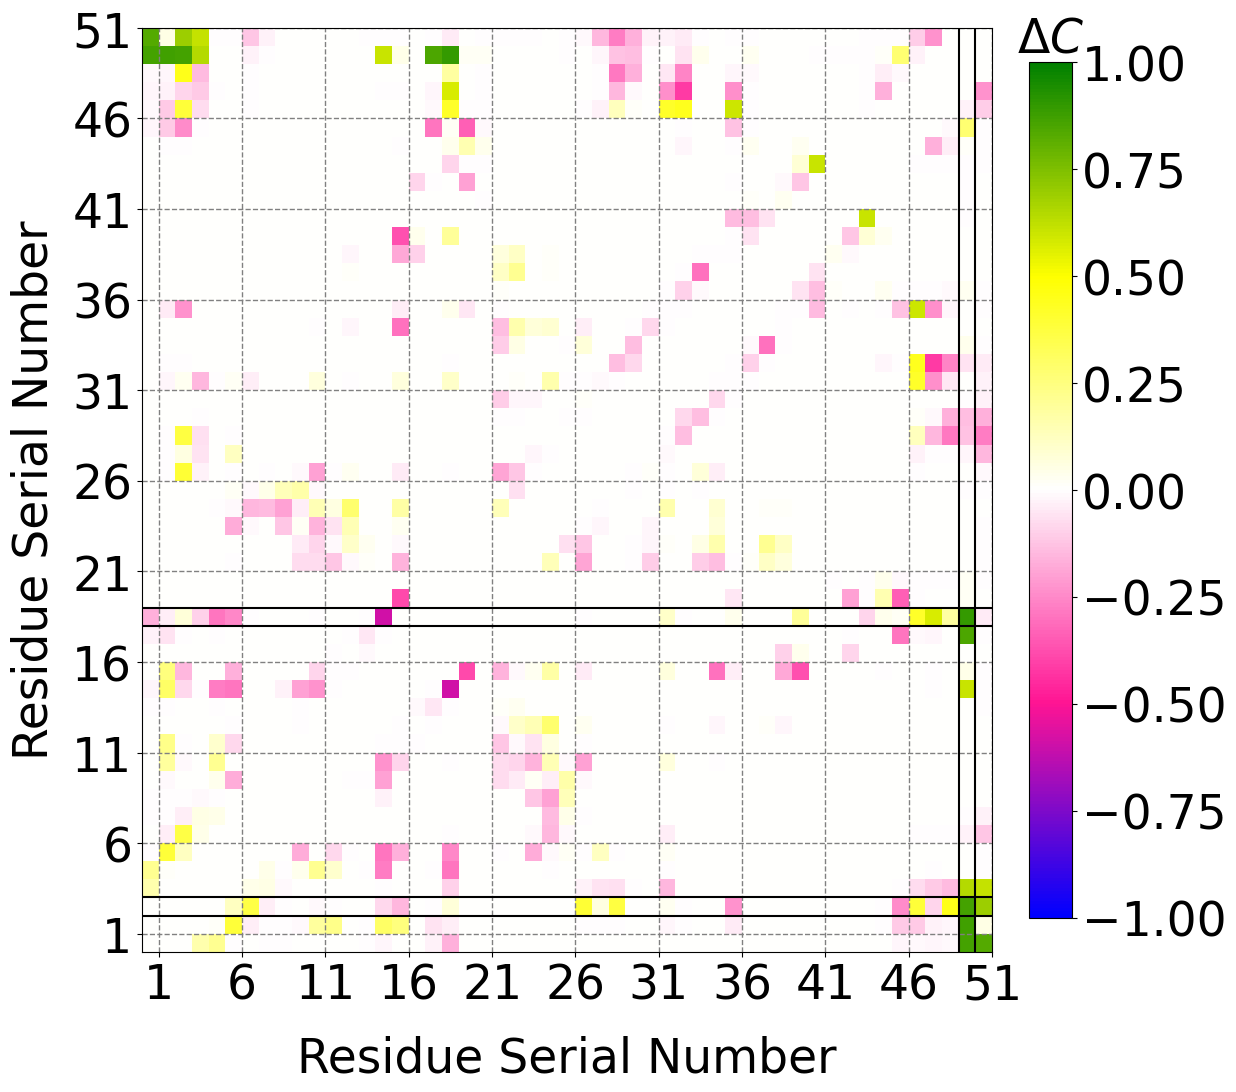

In [53]:
from contact_map import ContactFrequency, ContactDifference
from contact_map import AtomMismatchedContactDifference
import matplotlib.colors
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
import pandas as pd

diff = AtomMismatchedContactDifference(traj_contacts, traj_contacts_hi)

custom_cmap = matplotlib.colors.LinearSegmentedColormap.from_list("custom",["blue","deeppink","white","yellow","green"])
fig,ax=diff.residue_contacts.plot(figsize=(12,12),cmap=custom_cmap)
fig.axes[1].yaxis.set_tick_params(labelsize=34)
fig.axes[1].set_title("$\Delta C$",fontsize=34)
ax.axvline(50, color='k', lw=1.5)
ax.axvline(49, color='k', lw=1.5)
ax.axhline(2, color='k', lw=1.5)
ax.axhline(3, color='k', lw=1.5)
ax.axhline(19, color='k', lw=1.5)
ax.axhline(18, color='k', lw=1.5)
plt.xlabel("Residue Serial Number", fontsize=34)
_ = plt.ylabel("Residue Serial Number", fontsize=34)

#plt.xticks(np.arange(51), np.arange(1,51+1),fontsize=34)
#plt.yticks(np.arange(51), np.arange(1,51+1),fontsize=34)
plt.xticks(np.arange(1, 51.1, 5.0),fontsize=34)
plt.yticks(np.arange(1, 51.1, 5.0),fontsize=34)
#plt.xlim(0,51)
ax.set_xlim(0,51)
ax.set_ylim(0,51)
plt.grid(color='grey', linestyle='--', linewidth='1.0')
ax.grid(color='grey', linestyle='--', linewidth='1.0')
ax.xaxis.set_label_coords(.5, -.09)
ax.yaxis.set_label_coords(-.1, .5)
# Extracting contact difference data
contact_diff_data = diff.residue_contacts.df.truncate(before=None, after=50, axis=None, copy=None)#.values
contact_diff_data1 = contact_diff_data.truncate(before=None, after=50, axis=1, copy=None)#.values
#print(contact_diff_data1)

# saving the dataframe
contact_diff_data1.to_csv('contact_diff_data.csv')

#plt.ylim(0,51)
#plt.savefig('contact_map.pdf')


# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('contact_map_diff.jpg', bbox_inches='tight', transparent=True, dpi=600)

CPU times: user 1.1 s, sys: 8.25 ms, total: 1.11 s
Wall time: 1.11 s


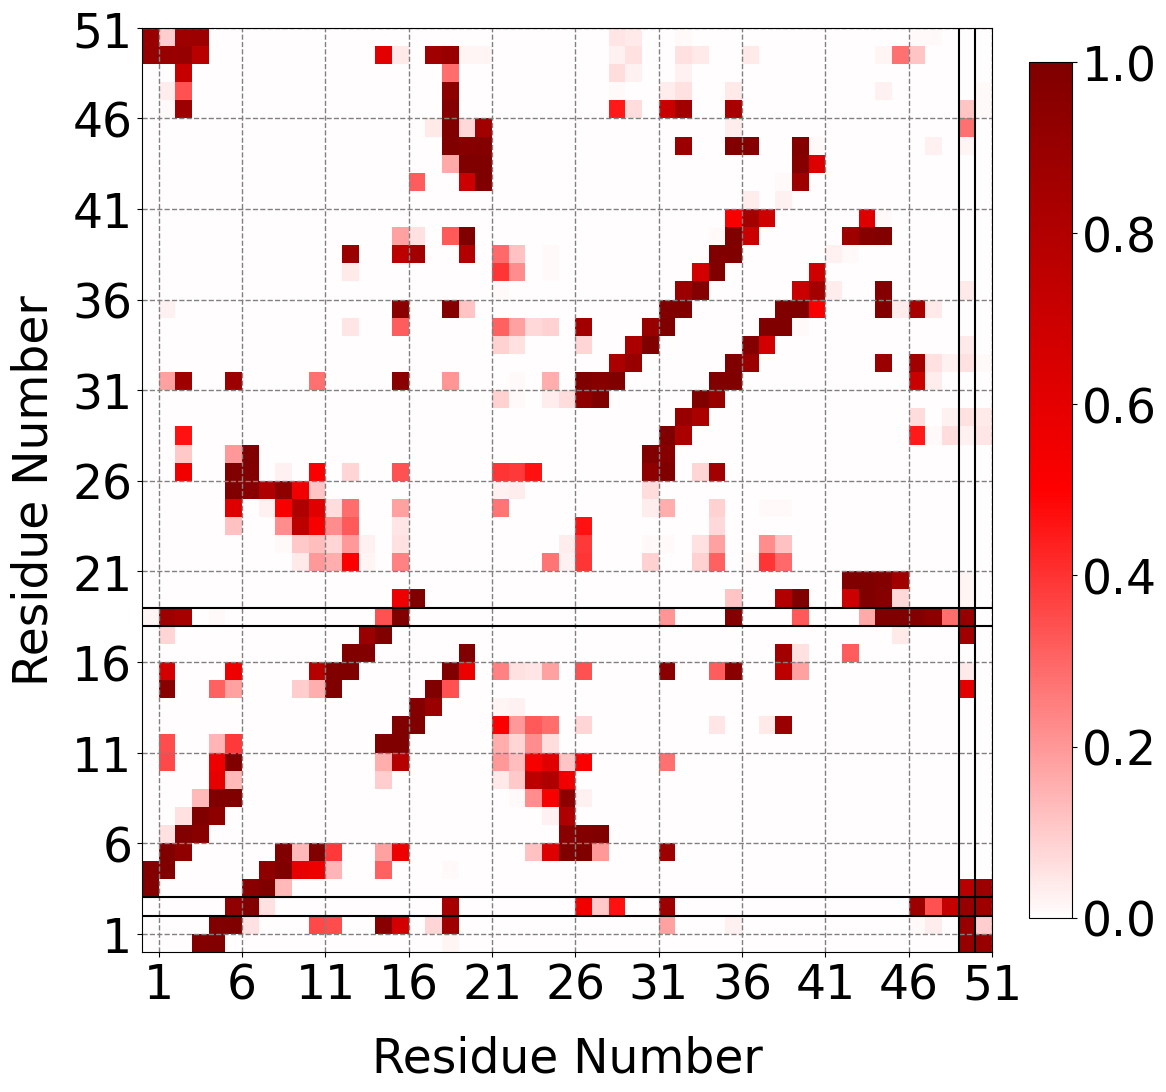

In [15]:
%%time
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
fig,ax=traj_contacts.residue_contacts.plot(figsize=(12,12))
fig.axes[1].yaxis.set_tick_params(labelsize=34)
ax.axvline(50, color='k', lw=1.5)
ax.axvline(49, color='k', lw=1.5)
ax.axhline(2, color='k', lw=1.5)
ax.axhline(3, color='k', lw=1.5)
ax.axhline(19, color='k', lw=1.5)
ax.axhline(18, color='k', lw=1.5)
plt.xlabel("Residue Number", fontsize=34)
_ = plt.ylabel("Residue Number", fontsize=34)

#plt.xticks(np.arange(51), np.arange(1,51+1),fontsize=34)
#plt.yticks(np.arange(51), np.arange(1,51+1),fontsize=34)
plt.xticks(np.arange(1, 51.1, 5.0),fontsize=34)
plt.yticks(np.arange(1, 51.1, 5.0),fontsize=34)
#plt.xlim(0,51)
ax.set_xlim(0,51)
ax.set_ylim(0,51)
plt.grid(color='grey', linestyle='--', linewidth='1.0')
ax.grid(color='grey', linestyle='--', linewidth='1.0')
ax.xaxis.set_label_coords(.5, -.09)
ax.yaxis.set_label_coords(-.1, .5)

#ax.xaxis.set_minor_locator(MultipleLocator(2.5))
#ax.yaxis.set_minor_locator(MultipleLocator(3.0))
#ax.tick_params(which='minor', length=2, color='black')
#ax.tick_params(which='both', width=2)
#ax.grid(b=True, which='minor', linestyle='--')

#plt.ylim(0,51)
#plt.savefig('contact_map.pdf')

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('contact_map.jpg', bbox_inches='tight', transparent=True, dpi=600)

In [19]:
#fig.savefig('traj_contacts.png')
#traj_contacts.save_to_file('traj_contacts.p')
# to reload it:
# ContactFrequency.from_file('traj_contacts.p')

In [16]:
topology=t.topology
fhi50=topology.residue(49)
print(fhi50)

FHI49


In [17]:
# Most common residue-residue contact involving FHI50
for contact in traj_contacts.residue_contacts.most_common(fhi50):
    if contact[1] > 0.1:
        print(contact)

([FHI49, VAL2], 0.9093413802151666)
([GLY0, FHI49], 0.9064987317414502)
([ILE1, FHI49], 0.9062363334207995)
([FHI49, TYR18], 0.9021254263972711)
([ASN17, FHI49], 0.8722994839499694)
([FHI49, GLH3], 0.7754307705764016)
([FHI49, GLN14], 0.6122190151316365)
([FHI49, PHE45], 0.2806350039359748)
([FHI49, TYR46], 0.11064462520773201)


In [9]:
#traj_contacts.most_common_atoms_for_residue(fhi50)[:]

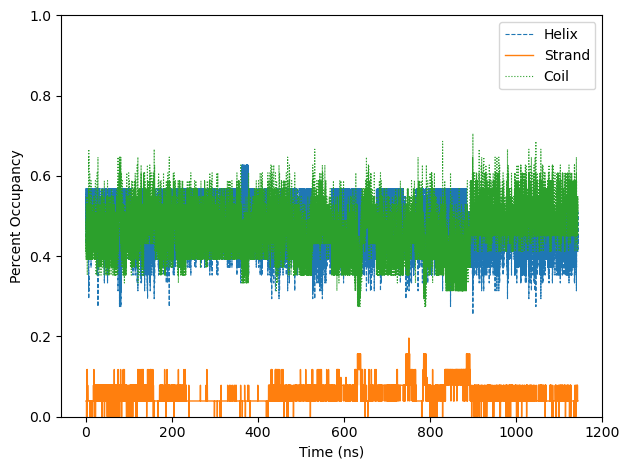

In [19]:
# For secondary structure analysis
protein_sel=t.topology.select('resid 0 to 50')
protein_traj=t.atom_slice(protein_sel)

plt.clf()

dssp = md.compute_dssp(protein_traj,simplified=True)
dssp_counts = []
for d in dssp:
    unique, counts = np.unique(d, return_counts=True)
    dssp_counts.append(dict(zip(unique, counts)))

#total_vals = sum(dssp_counts[0].values())
total_vals = sum(np.array(list(dssp_counts[0].values())).astype(float))
#B_values = []
#for d in dssp_counts:
#    B_values.append(d.get('B',0)/float(total_vals))
#S_values = []
#for d in dssp_counts:
#    S_values.append(d['S']/float(total_vals))
H_values = []
for d in dssp_counts:
    H_values.append(d['H']/float(total_vals))
E_values = []
for d in dssp_counts:
    E_values.append(d.get('E',0)/float(total_vals))
#G_values = []
#for d in dssp_counts:
#    G_values.append(d.get('G',0)/float(total_vals))
#I_values = []
#for d in dssp_counts:
#    I_values.append(d.get('I',0)/float(total_vals))
#T_values = []
#for d in dssp_counts:
#    T_values.append(d.get('T',0)/float(total_vals))
#L_values = []
#for d in dssp_counts:
#    L_values.append(d[' ']/float(total_vals))
C_values = []
for d in dssp_counts:
    C_values.append(d.get('C',0)/float(total_vals))
       
i=0.0
k=0
time_data=[]
H_data=[]
for x in H_values:
    i= i+1
    k= k+1
    j= i/20.0
    #print(k)
    time_i=j
    H_i=x
    time_data.append(time_i)
    H_data.append(H_i)
plt.plot(time_data,H_data,label='Helix',linewidth=0.8,linestyle='dashed');
#plt.plot(S_values,label='bend',linewidth=0.5);
#plt.plot(L_values,label='loops and irregular elements',linewidth=0.5);
#plt.plot(B_values,label='Residue in isolated beta-bridge',linewidth=0.5);
i=0.0
k=0
time_data=[]
E_data=[]
for x in E_values:
    i= i+1
    k= k+1
    j= i/20.0
    #print(k)
    time_i=j
    E_i=x
    time_data.append(time_i)
    E_data.append(E_i)
plt.plot(time_data,E_data,label='Strand',linewidth=1.0);
#plt.plot(G_values,label='3-helix (3/10 helix)',linewidth=0.5);
#plt.plot(I_values,label='5 helix (pi helix)',linewidth=0.5);
#plt.plot(T_values,label='hydrogen bonded turn',linestyle='dotted',linewidth=0.5);
i=0.0
k=0
time_data=[]
C_data=[]
for x in C_values:
    i= i+1
    k= k+1
    j= i/20.0
    #print(k)
    time_i=j
    C_i=x
    time_data.append(time_i)
    C_data.append(C_i)
plt.plot(time_data,C_data,label='Coil',linewidth=0.8,linestyle='dotted');
plt.xlabel('Time (ns)')
plt.ylabel('Percent Occupancy')
plt.ylim(0,1)
plt.legend();

plt.tight_layout()

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('data/dssp.eps')

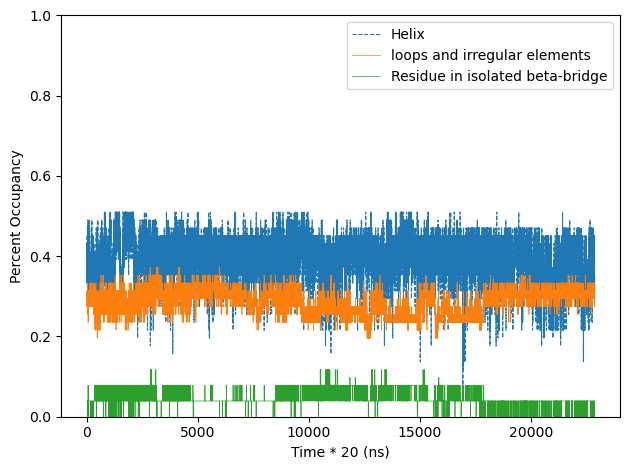

In [20]:
# For secondary structure analysis
protein_sel=t.topology.select('resid 0 to 50')
protein_traj=t.atom_slice(protein_sel)

plt.clf()

dssp = md.compute_dssp(protein_traj,simplified=False)
dssp_counts = []
for d in dssp:
    unique, counts = np.unique(d, return_counts=True)
    dssp_counts.append(dict(zip(unique, counts)))

#total_vals = sum(dssp_counts[0].values())
total_vals = sum(np.array(list(dssp_counts[0].values())).astype(float))
B_values = []
for d in dssp_counts:
    B_values.append(d.get('B',0)/float(total_vals))
S_values = []
for d in dssp_counts:
    S_values.append(d['S']/float(total_vals))
H_values = []
for d in dssp_counts:
    H_values.append(d['H']/float(total_vals))
E_values = []
for d in dssp_counts:
    E_values.append(d.get('E',0)/float(total_vals))
G_values = []
for d in dssp_counts:
    G_values.append(d.get('G',0)/float(total_vals))
I_values = []
for d in dssp_counts:
    I_values.append(d.get('I',0)/float(total_vals))
T_values = []
for d in dssp_counts:
    T_values.append(d.get('T',0)/float(total_vals))
L_values = []
for d in dssp_counts:
    L_values.append(d[' ']/float(total_vals))
#C_values = []
#for d in dssp_counts:
#    C_values.append(d.get('C',0)/float(total_vals))
       
plt.plot(H_values,label='Helix',linewidth=0.8,linestyle='dashed');
#plt.plot(S_values,label='bend',linewidth=0.5);
plt.plot(L_values,label='loops and irregular elements',linewidth=0.5);
plt.plot(B_values,label='Residue in isolated beta-bridge',linewidth=0.5);
#plt.plot(E_values,label='Strand',linewidth=1.0);
#plt.plot(G_values,label='3-helix (3/10 helix)',linewidth=0.5);
#plt.plot(I_values,label='5 helix (pi helix)',linewidth=0.5);
#plt.plot(T_values,label='hydrogen bonded turn',linestyle='dotted',linewidth=0.5);
#plt.plot(C_values,label='Coil',linewidth=0.8,linestyle='dotted');
plt.xlabel('Time * 20 (ns)')
plt.ylabel('Percent Occupancy')
plt.ylim(0,1)
plt.legend();

plt.tight_layout()

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('data/dssp_non_simplified.pdf')

CPU times: user 213 ms, sys: 7.75 ms, total: 220 ms
Wall time: 151 ms


Text(0, 0.5, 'RMSD ($\\AA$)')

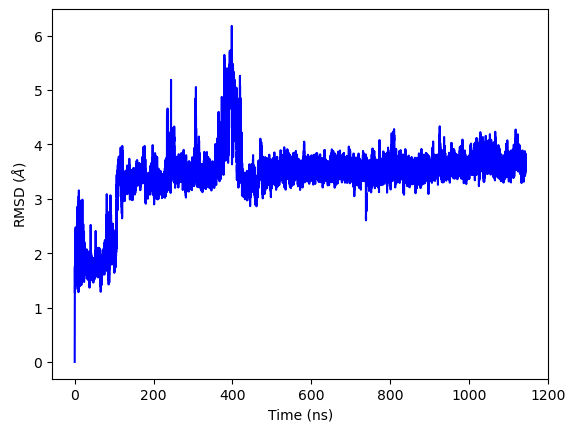

In [21]:
%%time
# C-alpha RMSD w.r.t. initial frame
protein_sel_CA=t.topology.select('resid 0 to 50 and name CA')
protein_traj_CA=t.atom_slice(protein_sel_CA)
protein_traj_CA.xyz=protein_traj_CA.xyz*10 # Converting nm to Angstrom
rmsd=md.rmsd(protein_traj_CA,protein_traj_CA,0)
i=0.0
k=0
time_data=[]
rmsd_data=[]
for x in rmsd:
    i= i+1
    k= k+1
    j= i/20.0
    #print(k)
    time_i=j
    rmsd_i=x
    time_data.append(time_i)
    rmsd_data.append(rmsd_i)
plt.plot(time_data,rmsd_data,ls='solid',color='blue')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD ($\AA$)')

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('rmsd0.pdf')

CPU times: user 217 ms, sys: 11.9 ms, total: 229 ms
Wall time: 548 ms


Text(0, 0.5, 'RMSD ($\\AA$)')

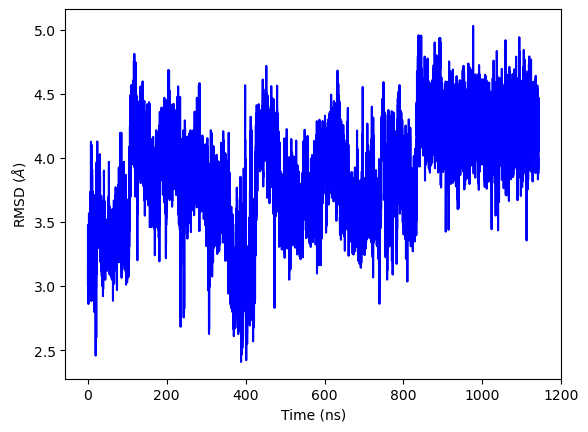

In [22]:
%%time
# C-alpha RMSD with respect to X-ray crystal structure
pdb = md.load_pdb('../hi/setup/1guj_monomer.pdb')
pdb_sel_CA=pdb.topology.select('protein and name CA')
pdb_traj_CA=pdb.atom_slice(pdb_sel_CA)
pdb_traj_CA.xyz=pdb_traj_CA.xyz*10 # Converting nm to Angstrom
protein_sel_CA=t.topology.select('resid 0 to 50 and name CA')
protein_traj_CA=t.atom_slice(protein_sel_CA)
protein_traj_CA.xyz=protein_traj_CA.xyz*10 # Converting nm to Angstrom
rmsd=md.rmsd(protein_traj_CA,pdb_traj_CA,0)
i=0.0
k=0
time_data=[]
rmsd_data=[]
for x in rmsd:
    i= i+1
    k= k+1
    j= i/20.0
    #print(k)
    time_i=j
    rmsd_i=x
    time_data.append(time_i)
    rmsd_data.append(rmsd_i)
plt.plot(time_data,rmsd_data,ls='solid',color='blue')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD ($\AA$)')
#plt.savefig('rmsdX.pdf')

CPU times: user 260 ms, sys: 3.33 ms, total: 263 ms
Wall time: 241 ms


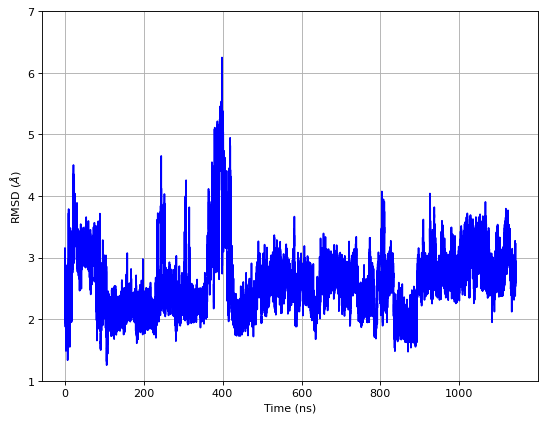

In [23]:
%%time
import math
from matplotlib.pyplot import figure
figure(figsize=(8, 6), dpi=80)
# C-alpha RMSD with respect to NMR average structure
#pdb = md.load_pdb('../hi/setup/1guj_monomer.pdb')
nmr_av_traj=md.load_pdb('../hi/setup/2jv1_original_av.pdb')
pdb_sel_CA=nmr_av_traj.topology.select('protein and name CA')
pdb_traj_CA=nmr_av_traj.atom_slice(pdb_sel_CA)
pdb_traj_CA.xyz=pdb_traj_CA.xyz*10 # Converting nm to Angstrom
protein_sel_CA=t.topology.select('resid 0 to 50 and name CA')
protein_traj_CA=t.atom_slice(protein_sel_CA)
protein_traj_CA.xyz=protein_traj_CA.xyz*10 # Converting nm to Angstrom
rmsd=md.rmsd(protein_traj_CA,pdb_traj_CA,0)
i=0.0
k=0
time_data=[]
rmsd_data=[]
for x in rmsd:
    i= i+1
    k= k+1
    j= i/20.0
    #print(k)
    time_i=j
    rmsd_i=x
    time_data.append(time_i)
    rmsd_data.append(rmsd_i)
plt.plot(time_data,rmsd_data,ls='solid',color='blue')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD ($\AA$)')
plt.xticks(np.arange(0, 1200, 200),fontsize=10)
plt.yticks(np.arange(1, 7.5, 1),fontsize=10)
plt.grid()
#plt.savefig('rmsd_nmr_av.pdf')

/home/shivaniv/anaconda3/lib/python3.11/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


CPU times: user 252 ms, sys: 7.78 ms, total: 260 ms
Wall time: 263 ms


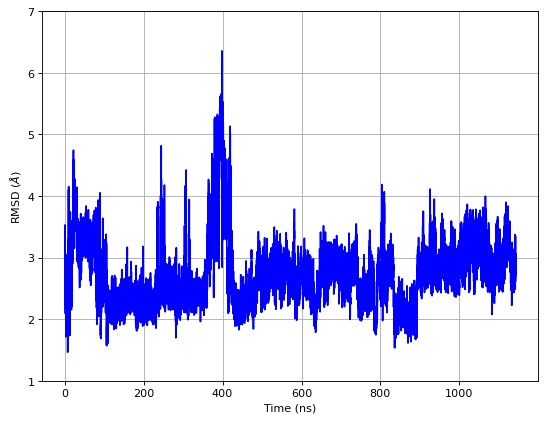

In [24]:
%%time
figure(figsize=(8, 6), dpi=80)
# C-alpha RMSD with respect to NMR first frame structure
#pdb = md.load_pdb('../hi/setup/1guj_monomer.pdb')
nmr_1=md.load_pdb('../hi/setup/2jv1_fix_CYS.pdb')
pdb_sel_CA=nmr_1.topology.select('protein and name CA')
pdb_traj_CA=nmr_1.atom_slice(pdb_sel_CA)
pdb_traj_CA.xyz=pdb_traj_CA.xyz*10 # Converting nm to Angstrom
protein_sel_CA=t.topology.select('resid 0 to 50 and name CA')
protein_traj_CA=t.atom_slice(protein_sel_CA)
protein_traj_CA.xyz=protein_traj_CA.xyz*10 # Converting nm to Angstrom
rmsd=md.rmsd(protein_traj_CA,pdb_traj_CA,0)
i=0.0
k=0
time_data=[]
rmsd_data=[]
for x in rmsd:
    i= i+1
    k= k+1
    j= i/20.0
    #print(k)
    time_i=j
    rmsd_i=x
    time_data.append(time_i)
    rmsd_data.append(rmsd_i)
plt.plot(time_data,rmsd_data,ls='solid',color='blue')
plt.xlabel('Time (ns)')
plt.ylabel('RMSD ($\AA$)')
plt.xticks(np.arange(0, 1200, 200),fontsize=10)
plt.yticks(np.arange(1,7.5, 1),fontsize=10)
plt.grid()
#plt.savefig('rmsd_nmr1.pdf')

In [25]:
t_hi=md.load('../hi/data/center.h5', top='../hi/data/solvated_2jv1.prmtop')
t_hi.superpose(t_hi, 0)

<mdtraj.Trajectory with 20000 frames, 12167 atoms, 3848 residues, and unitcells at 0x7fd558853d10>

In [26]:
protein_sel_CA_hi=t_hi.topology.select('resid 0 to 50 and name CA')
protein_traj_CA_hi=t_hi.atom_slice(protein_sel_CA_hi)
protein_traj_CA_hi.xyz=protein_traj_CA_hi.xyz*10 # Converting nm to Angstrom
rmsf_hi=md.rmsf(protein_traj_CA_hi,pdb_traj_CA)

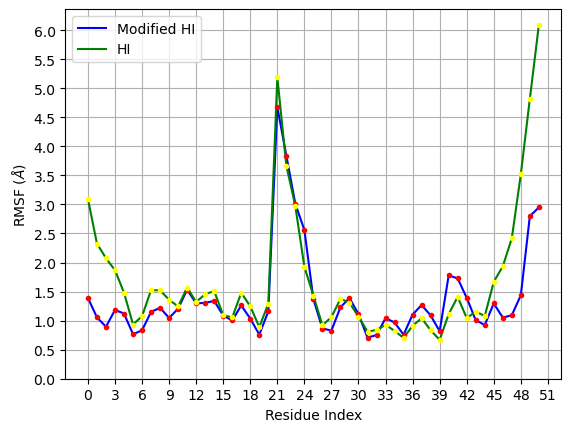

In [27]:
# C-alpha RMSF
rmsf=md.rmsf(protein_traj_CA,pdb_traj_CA)

plt.plot(rmsf,color='blue',)
plt.plot(rmsf_hi,color='green',)
plt.plot(rmsf,'.',color='red',)
plt.plot(rmsf_hi,'.',color='yellow',)
plt.xlabel('Residue')
plt.ylabel('RMSF ($\AA$)')
plt.xticks(np.arange(0, 52, 3),fontsize=10)
plt.yticks(np.arange(0, 6.5, 0.5),fontsize=10)
plt.xlabel('Residue Index')
location = 0 # For the best location
legend_drawn_flag = True
plt.legend(["Modified HI","HI"], loc=0, frameon=legend_drawn_flag)

plt.grid()
#plt.savefig('rmsf_hi_fhi.pdf')

In [46]:
nmr_1=md.load_pdb('../hi/setup/2jv1_fix_CYS.pdb')
pdb_sel_CA=nmr_1.topology.select('protein and name CA')
pdb_traj_CA=nmr_1.atom_slice(pdb_sel_CA)
protein_sel_CA_hi=t_hi.topology.select('resid 0 to 50 and name CA')
protein_traj_CA_hi=t_hi.atom_slice(protein_sel_CA_hi)
protein_traj_CA_hi.xyz=protein_traj_CA_hi.xyz*10 # Converting nm to Angstrom
rmsf_hi=md.rmsf(protein_traj_CA_hi,protein_traj_CA_hi,0)

/home/shivaniv/anaconda3/lib/python3.11/site-packages/mdtraj/formats/pdb/pdbfile.py:200: UserWarning: Unlikely unit cell vectors detected in PDB file likely resulting from a dummy CRYST1 record. Discarding unit cell vectors.
  warnings.warn('Unlikely unit cell vectors detected in PDB file likely '


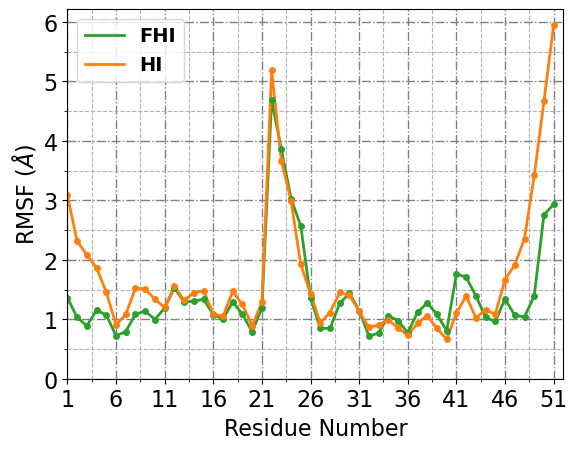

In [51]:
# C-alpha RMSF
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
legend_properties = {'weight':'bold','size':'14'}
pdb_traj_CA.xyz=pdb_traj_CA.xyz*10 # Converting nm to Angstrom
protein_sel_CA=t.topology.select('resid 0 to 50 and name CA')
protein_traj_CA=t.atom_slice(protein_sel_CA)
protein_traj_CA.xyz=protein_traj_CA.xyz*10 # Converting nm to Angstrom
rmsf=md.rmsf(protein_traj_CA,protein_traj_CA,0)


fig, ax = plt.subplots()
#fig,ax=plt.plot.rmsf(figsize=(12,12))
plt.plot(rmsf,color='tab:green',lw=2.0)
plt.plot(rmsf_hi,color='tab:orange',lw=2.0)
plt.plot(rmsf,'.',color='tab:green', ms=8.0)
plt.plot(rmsf_hi,'.',color='tab:orange',ms=8.0)
plt.xlabel('Residue',fontsize="16")
plt.ylabel('RMSF ($\AA$)',fontsize="16")
plt.xticks(np.arange(len(rmsf)), np.arange(1, len(rmsf)+1),fontsize=10)
plt.xlim(1,51)
plt.xticks(np.arange(0, 51, 5),fontsize=16)
plt.yticks(np.arange(0, 6.5, 1.0),fontsize=16)
plt.xlabel('Residue Number')
legend_drawn_flag = True
plt.legend(["FHI","HI"],loc=0, frameon=legend_drawn_flag,prop=legend_properties)
plt.grid(color='grey', linestyle='-.', linewidth='1.0')
#ax.xaxis.set_label_coords(.5, -.06)
#ax.yaxis.set_label_coords(-.07, .5)
ax.xaxis.grid(True, which='minor')
ax.xaxis.set_minor_locator(MultipleLocator(2.5))
ax.yaxis.set_minor_locator(MultipleLocator(0.5))
#plt.tick_params(which='minor', length=2, color='black')
#plt.tick_params(which='both', width=2)
plt.grid(visible=True, which='minor', linestyle='--')

# Save RMSF data to a CSV file
residue_numbers = np.arange(1, len(rmsf) + 1)
rmsf_data = pd.DataFrame({
    'Residue': residue_numbers,
    'RMSF_FHI': rmsf,
    'RMSF_HI': rmsf_hi
})
rmsf_data.to_csv('rmsf_data.csv', index=False)

#plt.ylim(0,51)

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('rmsf_hi_fhi_only.jpg', bbox_inches='tight', transparent=True, dpi=600)

CPU times: user 1.44 s, sys: 0 ns, total: 1.44 s
Wall time: 1.91 s


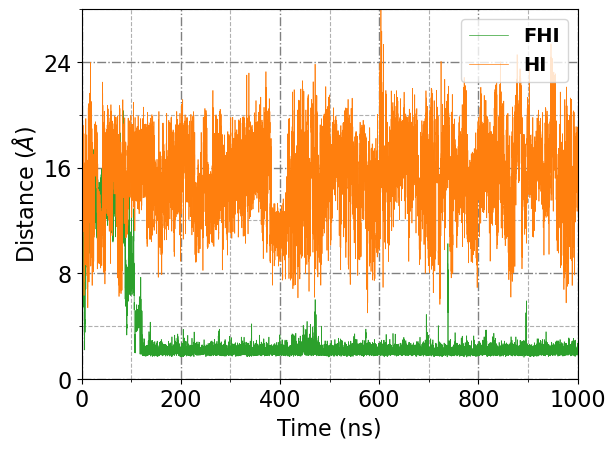

In [56]:
%%time
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
legend_properties = {'weight':'bold','size':'14'}
# Distance b/w Val H(NH) and Fhi O (backbone C=O)
fig, ax = plt.subplots()
val_fhi=np.array([[29, 774]], dtype=np.int32)
hbond=md.compute_distances(t, val_fhi, periodic=True, opt=True)

val_hi=np.array([[29, 774]], dtype=np.int32)
hbond_hi=md.compute_distances(t_hi, val_hi, periodic=True, opt=True)
i=0.0
k=0
time_data=[]
dist_data=[]
for x in hbond:
    i= i+1
    k= k+1
    j= i/20.0
    #print(k)
    time_i=j
    dist_i=x*10.0
    time_data.append(time_i)
    dist_data.append(dist_i)
    
i=0.0
k=0
time_data_hi=[]
dist_data_hi=[]
for x in hbond_hi:
    i= i+1
    k= k+1
    j= i/20.0
    #print(k)
    time_i=j
    dist_i=x*10.0
    time_data_hi.append(time_i)
    dist_data_hi.append(dist_i)
    
ax.plot(time_data,dist_data,ls='solid',linewidth='0.5',color='tab:green')
ax.plot(time_data_hi,dist_data_hi,ls='solid',linewidth='0.5',color='tab:orange')

plt.xticks(np.arange(0, 1200, 200),fontsize=16)
plt.yticks(np.arange(0, 28, 8),fontsize=16)
plt.xlim(0,1000)
plt.ylim(0,28)

plt.grid(color='grey', linestyle='-.', linewidth='1.0')
ax.xaxis.grid(True, which='minor', linestyle='--')
ax.yaxis.grid(True, which='minor', linestyle='--')
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(4))
#minor_locator = AutoMinorLocator(2)
#ax.yaxis.set_minor_locator(minor_locator)
#plt.grid(visible=True, which='minor', linestyle='--')
plt.xlabel('Time (ns)',fontsize=16)
plt.ylabel('Distance ($\AA$)',fontsize=16)
plt.legend(["FHI","HI"], loc='upper right',prop=legend_properties)
#plt.savefig('hbond_val_fhi.pdf')

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('hbond_val_fhi.jpg', bbox_inches='tight', transparent=True, dpi=600) 

CPU times: user 785 ms, sys: 0 ns, total: 785 ms
Wall time: 802 ms


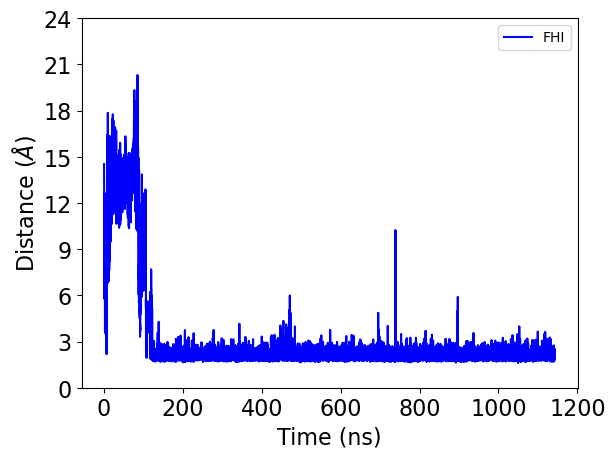

In [57]:
%%time
# Distance b/w Val H(NH) and Fhi O (backbone C=O)
val_fhi=np.array([[29, 774]], dtype=np.int32)
hbond=md.compute_distances(t, val_fhi, periodic=True, opt=True)

#val_hi=np.array([[29, 774]], dtype=np.int32)
#hbond_hi=md.compute_distances(t_hi, val_hi, periodic=True, opt=True)
i=0.0
k=0
time_data=[]
dist_data=[]
for x in hbond:
    i= i+1
    k= k+1
    j= i/20.0
    #print(k)
    time_i=j
    dist_i=x*10.0
    time_data.append(time_i)
    dist_data.append(dist_i)
    
#i=0.0
#k=0
#time_data_hi=[]
#dist_data_hi=[]
#for x in hbond_hi:
#    i= i+1
#    k= k+1
#    j= i/20.0
    #print(k)
#    time_i=j
#    dist_i=x*10.0
#   time_data_hi.append(time_i)
#   dist_data_hi.append(dist_i)
    
#plt.plot(time_data_hi,dist_data_hi,ls='solid',color='green')
plt.plot(time_data,dist_data,ls='solid',color='blue')
plt.xticks(np.arange(0, 1400, 200),fontsize=16)
plt.yticks(np.arange(0, 26, 3),fontsize=16)
plt.xlabel('Time (ns)',fontsize=16)
plt.ylabel('Distance ($\AA$)',fontsize=16)
legend_drawn_flag = True
plt.legend(["FHI"], loc=0, frameon=legend_drawn_flag)
#plt.savefig('hbond_val_fhi_only.pdf')

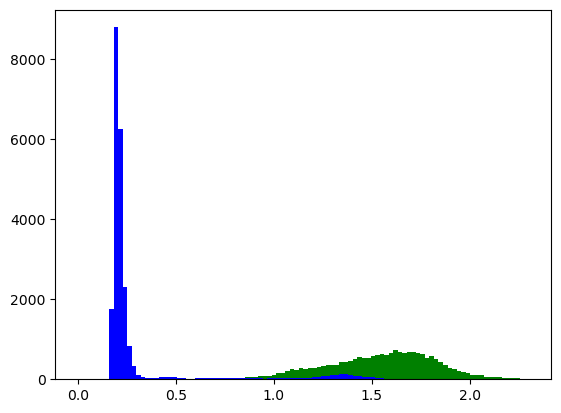

In [58]:
n1, bins1, patches1=plt.hist(hbond_hi,range=(0,2.3),bins=100,color='green')
n2, bins2, patches2=plt.hist(hbond,range=(0,2.3),bins=100,color='blue')

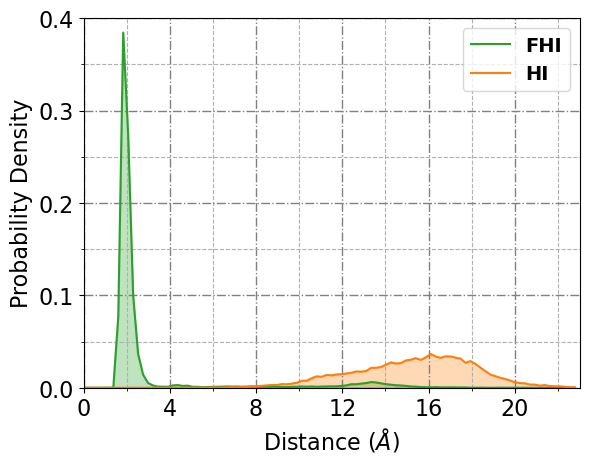

In [59]:
# This code is giving correct results.
# I have check it using vmd and histogram code.
legend_properties = {'weight':'bold','size':'14'}
y1 = n1/20000.0
xbins1=bins1[:-1]
y2 = n2/22866.0
xbins2=bins2[:-1]
#print(n/20000)
#print(bins)
fig,ax = plt.subplots()  
ax.plot(xbins2*10.0, y2, ls='solid', color ='tab:green')
ax.plot(xbins1*10.0, y1, ls='solid', color ='tab:orange')

plt.xticks(np.arange(0.0, 23, 4),fontsize=16)
plt.yticks(np.arange(0.0, 0.5, 0.1),fontsize=16)
plt.xlim(0,23)
plt.ylim(0.0,0.4)
ax.xaxis.grid(True, which='minor')
ax.xaxis.set_minor_locator(MultipleLocator(2.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
plt.grid(color='grey', linestyle='-.', linewidth='1.0')
plt.grid(visible=True, which='minor', linestyle='--')
ax.fill_between(xbins2*10.0, y2,0, alpha=0.3, color='tab:green')
ax.fill_between(xbins1*10.0, y1,0, alpha=0.3, color='tab:orange')
plt.xlabel('Distance ($\AA$)',fontsize=16)
plt.ylabel('Probability Density',fontsize=16)
plt.legend(["FHI","HI"], loc=0, frameon=legend_drawn_flag,prop=legend_properties)
#plt.title('H-bond interactions O(FHI 50) and H(VAL 3)\n',
#          fontweight ="bold") 
#plt.savefig('hist_hbond_val_fhi.pdf')

# I have commented the below line just because I don't want to modify the existing images.
# plt.savefig('hist_hbond_val_fhi.jpg', bbox_inches='tight', transparent=True, dpi=600) 

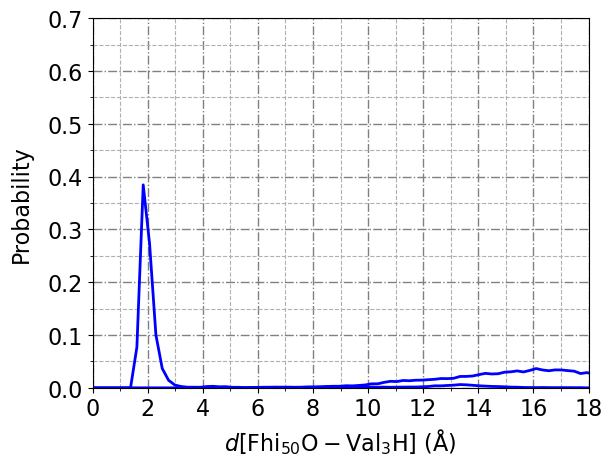

In [60]:
# This code is giving correct results.
# I have check it using vmd and histogram code.

y1 = n1/20000.0
xbins1=bins1[:-1]
y2 = n2/22866.0
xbins2=bins2[:-1]
#print(n/20000)
#print(bins)
new_xbins2=xbins2
new_y2=y2
new_xbins1=xbins1
new_y1=y1
fig, ax = plt.subplots()
plt.plot(xbins2*10.0, y2, ls='solid', color ='blue',lw=2.0)
plt.plot(xbins1*10.0, y1, ls='solid', color ='blue',lw=2.0)
plt.xticks(np.arange(0.0, 19, 2),fontsize=16)
plt.yticks(np.arange(0.0, 0.75, 0.1),fontsize=16)
plt.xlabel('$d[\mathrm{Fhi_{50}O-Val_3H]}$ ($\mathrm{\AA}$)',fontsize=16)
plt.ylabel('Probability',fontsize=16)
plt.xlim(0,18)
plt.ylim(0.0,0.7)
#plt.legend(["FHI"], loc=0, frameon=legend_drawn_flag)
#plt.title('H-bond Interactions O(FHI 50) and H(VAL 3)\n',
#          fontweight ="bold") 
plt.grid(color='grey', linestyle='-.', linewidth='1.0')
#ax.xaxis.set_label_coords(.5, -.06)
ax.yaxis.set_label_coords(-.12, .5)
ax.xaxis.grid(True, which='minor')
ax.xaxis.set_minor_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
plt.grid(visible=True, which='minor', linestyle='--')

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('hist_hbond_val_fhi_only.jpg', bbox_inches='tight', transparent=True, dpi=600)

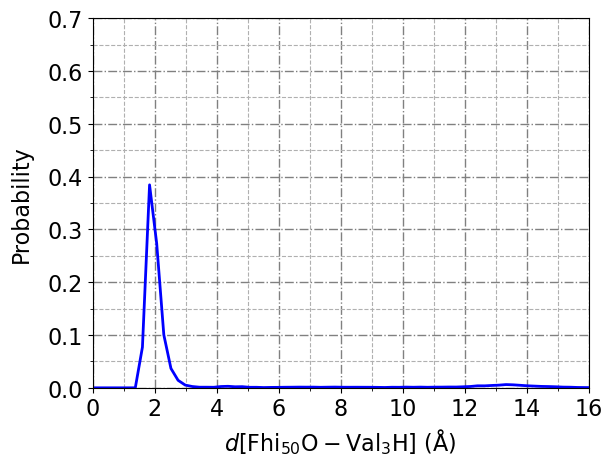

In [61]:
# This code is giving correct results.
# I have check it using vmd and histogram code.

y1 = n1/20000.0
xbins1=bins1[:-1]
y2 = n2/22866.0
xbins2=bins2[:-1]
#print(n/20000)
#print(bins)

fig, ax = plt.subplots()
plt.plot(xbins2*10.0, y2, ls='solid', color ='blue',lw=2.0)
plt.xticks(np.arange(0.0, 17, 2),fontsize=16)
plt.yticks(np.arange(0.0, 0.75, 0.1),fontsize=16)
plt.xlabel('$d[\mathrm{Fhi_{50}O-Val_3H]}$ ($\mathrm{\AA}$)',fontsize=16)
plt.ylabel('Probability',fontsize=16)
plt.xlim(0,16)
plt.ylim(0.0,0.7)
#plt.legend(["FHI"], loc=0, frameon=legend_drawn_flag)
#plt.title('H-bond Interactions O(FHI 50) and H(VAL 3)\n',
#          fontweight ="bold") 
plt.grid(color='grey', linestyle='-.', linewidth='1.0')
#ax.xaxis.set_label_coords(.5, -.06)
ax.yaxis.set_label_coords(-.12, .5)
ax.xaxis.grid(True, which='minor')
ax.xaxis.set_minor_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
plt.grid(visible=True, which='minor', linestyle='--')

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('hist_hbond_val_fhi_only.jpg', bbox_inches='tight', transparent=True, dpi=600)

CPU times: user 798 ms, sys: 8.95 ms, total: 807 ms
Wall time: 885 ms


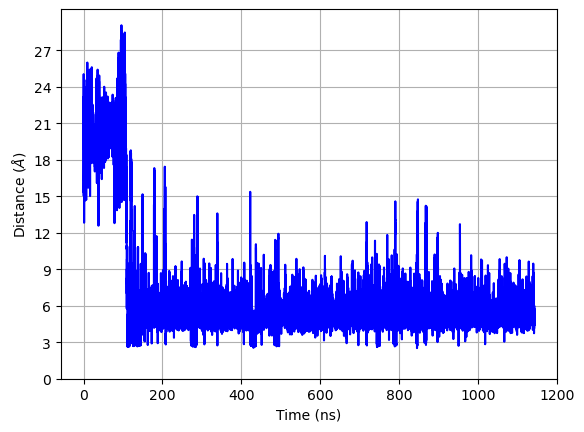

In [62]:
%%time
glh_lys=np.array([[267, 775]], dtype=np.int32)
salt_bridge_oe1=md.compute_distances(t, glh_lys, periodic=True, opt=True)
i=0.0
k=0
time_data=[]
dist_data=[]
for x in salt_bridge_oe1:
    i= i+1
    k= k+1
    j= i/20.0
    #print(k)
    time_i=j
    dist_i=x*10.0
    time_data.append(time_i)
    dist_data.append(dist_i)
plt.plot(time_data,dist_data,ls='solid',color='blue')
plt.xlabel('Time (ns)')
plt.ylabel('Distance ($\AA$)')
plt.xticks(np.arange(0, 1400, 200),fontsize=10)
plt.yticks(np.arange(0, 30, 3),fontsize=10)
plt.grid()

GLY0-N -- GLH3-OE1
GLY0-N -- GLH3-OE2
GLY0-N -- GLN4-OE1
GLY0-N -- FHI49-O
GLY0-N -- THR50-O
GLY0-N -- THR50-OXT
GLY0-N -- GLH3-OE1
GLY0-N -- GLH3-OE2
GLY0-N -- GLN4-OE1
GLY0-N -- FHI49-O
GLY0-N -- THR50-O
GLY0-N -- THR50-OXT
GLY0-N -- GLH3-OE1
GLY0-N -- GLH3-OE2
GLY0-N -- GLN4-OE1
GLY0-N -- GLN4-NE2
GLY0-N -- FHI49-O
GLY0-N -- THR50-O
GLY0-N -- THR50-OXT
ILE1-N -- TYR18-OH
ILE1-N -- FHI49-O
VAL2-N -- GLY0-O
VAL2-N -- FHI49-O
VAL2-N -- THR50-OG1
GLH3-N -- GLY0-O
GLH3-N -- GLH3-OE1
GLH3-N -- FHI49-O
GLH3-N -- THR50-OG1
GLH3-N -- THR50-O
GLH3-N -- THR50-OXT
GLN4-NE2 -- GLY0-O
GLN4-NE2 -- GLH3-OE1
GLN4-NE2 -- GLN4-O
GLN4-NE2 -- SER8-OG
GLN4-NE2 -- ILE9-O
GLN4-NE2 -- GLN14-OE1
GLN4-NE2 -- GLY0-O
GLN4-NE2 -- SER8-OG
GLN4-NE2 -- ILE9-O
GLN4-NE2 -- SER11-OG
GLN4-NE2 -- GLN14-OE1
GLN4-NE2 -- GLN14-NE2
GLN4-N -- GLY0-O
GLN4-N -- ILE1-O
GLN4-N -- GLN4-OE1
CYS5-N -- ILE1-O
CYS5-N -- VAL2-O
CYS6-N -- VAL2-O
CYS6-N -- GLH3-O
THR7-N -- VAL2-O
THR7-N -- GLH3-O
THR7-N -- GLN4-O
THR7-N -- CYS5-O
SER8-N

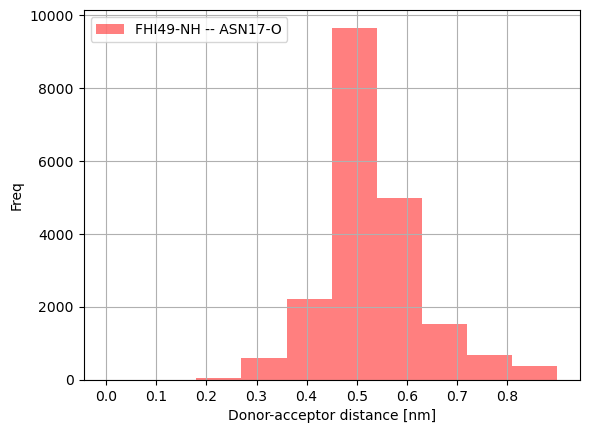

In [63]:
from __future__ import print_function
import itertools
import mdtraj.testing
protein_sel=t.topology.select('resid 0 to 50')
protein_traj=t.atom_slice(protein_sel)
fhi=t.topology.select('index 775')
fhi_traj=t.atom_slice(fhi)
#print(len(fhi_traj))
hbonds = md.baker_hubbard(protein_traj,freq=0.001,periodic=False)
label = lambda hbond : '%s -- %s' % (protein_traj.topology.atom(hbond[0]), protein_traj.topology.atom(hbond[2]))
for hbond in hbonds:
    print(label(hbond))
    
da_distances = md.compute_distances(protein_traj, hbonds[:, [0,2]], periodic=False)

color = itertools.cycle(['r'])
for i in [269]:
    plt.hist(da_distances[:, i], range=(0,0.9), color=next(color), label=label(hbonds[i]), alpha=0.5)
plt.legend()
plt.ylabel('Freq');
plt.xlabel('Donor-acceptor distance [nm]')
plt.xticks(np.arange(0, 0.9, 0.1),fontsize=10)
plt.yticks(np.arange(0, 12000, 2000),fontsize=10)
plt.grid()

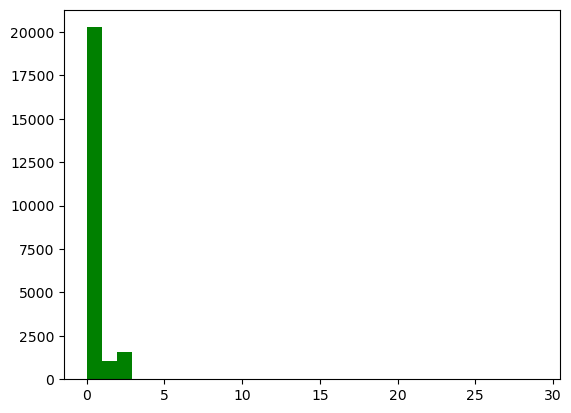

In [64]:
n, bins, patches=plt.hist(salt_bridge_oe1,range=(0,29),bins=30,color='green')

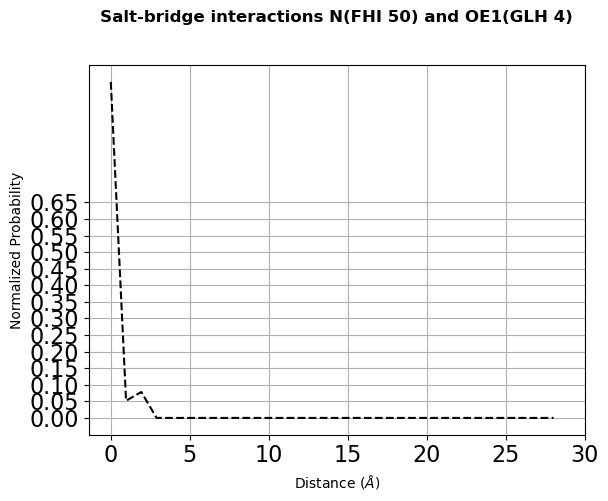

In [65]:
# This code is giving correct results.
# I have check it using vmd and histogram code.

y = n/20000.0
xbins=bins[:-1]
#print(n/20000)
#print(bins)
  
plt.plot(xbins, y, '--', color ='black')
plt.xticks(np.arange(0.0, 31, 5),fontsize=16)
plt.yticks(np.arange(0.0, 0.70, 0.05),fontsize=16)
plt.xlabel('Distance ($\AA$)')
plt.ylabel('Normalized Probability')
plt.grid()
  
plt.title('Salt-bridge interactions N(FHI 50) and OE1(GLH 4)\n\n',
          fontweight ="bold")
  
plt.show()

Text(0, 0.5, 'Distance ($\\AA$)')

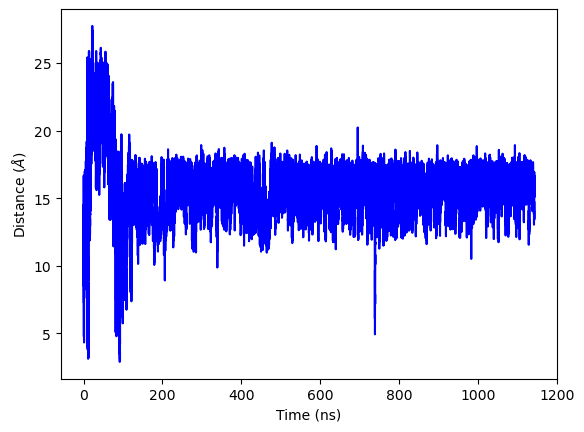

In [66]:
glh_lys=np.array([[56, 771]], dtype=np.int32)
salt_bridge_oe2=md.compute_distances(t, glh_lys, periodic=True, opt=True)
i=0.0
k=0
time_data=[]
dist_data=[]
for x in salt_bridge_oe2:
    i= i+1
    k= k+1
    j= i/20.0
    #print(k)
    time_i=j
    dist_i=x*10.0
    time_data.append(time_i)
    dist_data.append(dist_i)
plt.plot(time_data,dist_data,ls='solid',color='blue')
plt.xlabel('Time (ns)')
plt.ylabel('Distance ($\AA$)')

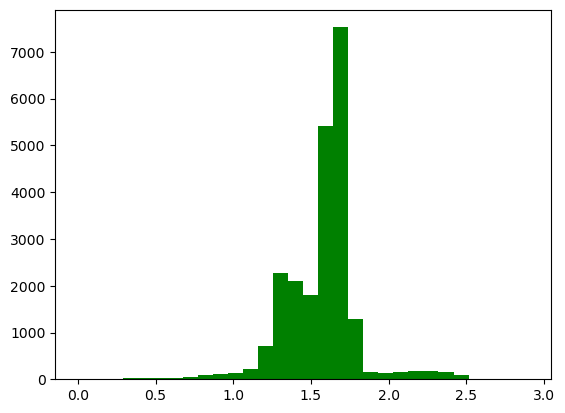

In [67]:
n, bins, patches=plt.hist(salt_bridge_oe2,range=(0,2.9),bins=30,color='green')

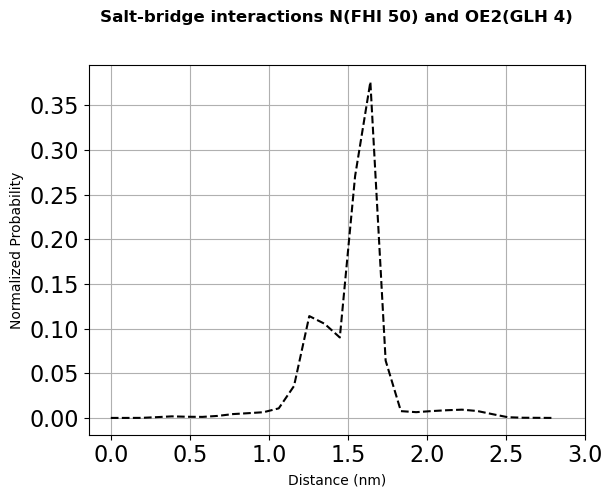

In [68]:
# This code is giving correct results.
# I have check it using vmd and histogram code.

y = n/20000.0
xbins=bins[:-1]
#print(n/20000)
#print(bins)
  
plt.plot(xbins, y, '--', color ='black')
plt.xticks(np.arange(0.0, 3.1, 0.5),fontsize=16)
plt.yticks(np.arange(0.0, 0.40, 0.05),fontsize=16)
plt.xlabel('Distance (nm)')
plt.ylabel('Normalized Probability')
plt.grid()
  
plt.title('Salt-bridge interactions N(FHI 50) and OE2(GLH 4)\n\n',
          fontweight ="bold")
  
plt.show()

<Figure size 640x480 with 0 Axes>

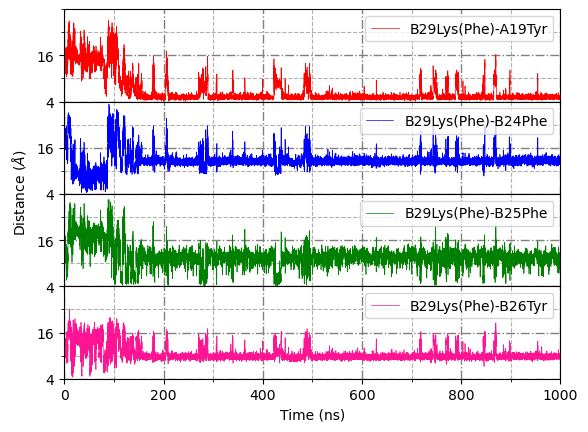

In [69]:
import math
from matplotlib.pyplot import figure
from matplotlib.ticker import AutoMinorLocator
protein_sel=t.topology.select('resid 0 to 50')
protein_traj=t.atom_slice(protein_sel)

#FHI 50 COM
fhi50_sel=t.topology.select('index 784 785 787 789 791 793')
fhi50_traj=t.atom_slice(fhi50_sel)
fhi50_com=md.compute_center_of_mass(fhi50_traj)

#TYR 19 COM
tyr19_sel=t.topology.select('index 275 276 278 280 283 285')
tyr19_traj=t.atom_slice(tyr19_sel)
tyr19_com=md.compute_center_of_mass(tyr19_traj)

#TYR 47 COM
tyr47_sel=t.topology.select('index 713 714 716 718 721 723')
tyr47_traj=t.atom_slice(tyr47_sel)
tyr47_com=md.compute_center_of_mass(tyr47_traj)

#PHE 46 COM
phe46_sel=t.topology.select('index 693 694 696 698 700 702')
phe46_traj=t.atom_slice(phe46_sel)
phe46_com=md.compute_center_of_mass(phe46_traj)
fhi50_phe46=fhi50_com-phe46_com

#PHE 45 COM
phe45_sel=t.topology.select('index 673 674 676 678 680 682')
phe45_traj=t.atom_slice(phe45_sel)
phe45_com=md.compute_center_of_mass(phe45_traj)
fhi50_phe45=fhi50_com-phe45_com

i=0.0
k=0
time_data=[]
dist_data1=[]
dist_data2=[]
dist_data3=[]
dist_data4=[]
x=[]
y=[]
for (coord_fhi,coord_tyr) in zip(fhi50_com,tyr19_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_fhi,coord_tyr):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    time_data.append(time_i)
    dist_data1.append(dist_i)
    
for (coord_fhi,coord_tyr) in zip(fhi50_com,tyr47_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_fhi,coord_tyr):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    dist_data2.append(dist_i) 
    
for (coord_fhi,coord_phe) in zip(fhi50_com,phe46_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_fhi,coord_phe):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    dist_data3.append(dist_i)

for (coord_fhi,coord_phe) in zip(fhi50_com,phe45_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_fhi,coord_phe):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    dist_data4.append(dist_i)
    
figure(figsize=(8, 6), dpi=80)
fig, ax = plt.subplots(4)
fig.subplots_adjust(hspace=0)
ax[0].grid(color='grey', linestyle='-.', linewidth='1.0')
ax[1].grid(color='grey', linestyle='-.', linewidth='1.0')
ax[2].grid(color='grey', linestyle='-.', linewidth='1.0')
ax[3].grid(color='grey', linestyle='-.', linewidth='1.0')
plt.xlabel('Time (ns)')
ax[0].set_xlim(0,1000)
ax[0].set_ylim(4,28)
ax[1].set_xlim(0,1000)
ax[1].set_ylim(4,28)
ax[2].set_xlim(0,1000)
ax[2].set_ylim(4,28)
ax[3].set_xlim(0,1000)
ax[3].set_ylim(4,28)
fig.text(0.04, 0.5, 'Distance ($\AA$)', va='center', rotation='vertical')
ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_xticklabels([])
ax[3].set_xticks(np.arange(0, 1200, 200))
ax[0].set_yticks(np.arange(4, 28, 12))
ax[1].set_yticks(np.arange(4, 28, 12))
ax[2].set_yticks(np.arange(4, 28, 12))
ax[3].set_yticks(np.arange(4, 28, 12))
ax[0].grid(True)
ax[1].grid(True)
ax[2].grid(True)

minor_locator = AutoMinorLocator(2)
ax[0].yaxis.set_minor_locator(minor_locator)
ax[1].yaxis.set_minor_locator(minor_locator)
ax[2].yaxis.set_minor_locator(minor_locator)
ax[3].yaxis.set_minor_locator(minor_locator)
ax[0].xaxis.set_minor_locator(MultipleLocator(100))
ax[1].xaxis.set_minor_locator(MultipleLocator(100))
ax[2].xaxis.set_minor_locator(MultipleLocator(100))
ax[3].xaxis.set_minor_locator(MultipleLocator(100))
ax[0].grid(visible=True, which='minor', linestyle='--')
ax[1].grid(visible=True, which='minor', linestyle='--')
ax[2].grid(visible=True, which='minor', linestyle='--')
ax[3].grid(visible=True, which='minor', linestyle='--')

ax[0].plot(time_data,dist_data1,ls='solid',linewidth='0.5',color='red')
ax[1].plot(time_data,dist_data4,ls='solid',linewidth='0.5',color='blue')
ax[2].plot(time_data,dist_data3,ls='solid',linewidth='0.5',color='green')
ax[3].plot(time_data,dist_data2,ls='solid',linewidth='0.5',color='deeppink')

ax[0].legend(['B29Lys(Phe)-A19Tyr'],loc='upper right')
ax[1].legend(['B29Lys(Phe)-B24Phe'],loc='upper right')
ax[2].legend(['B29Lys(Phe)-B25Phe'],loc='upper right')
ax[3].legend(['B29Lys(Phe)-B26Tyr'],loc='upper right')

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('com.jpg', bbox_inches='tight', transparent=True, dpi=600) 

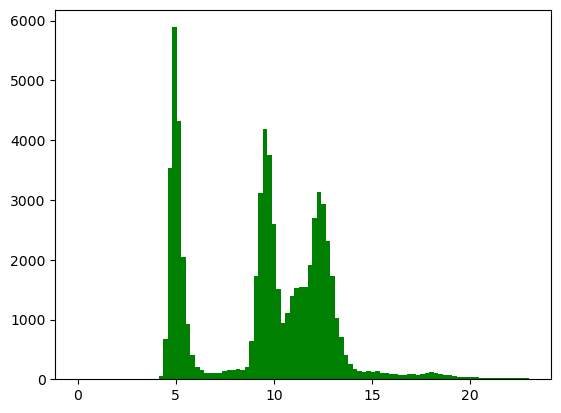

In [70]:
import matplotlib.pyplot as plt
n1, bins1, patches=plt.hist(dist_data1,range=(0,23),bins=100,color='green')
n2, bins2, patches=plt.hist(dist_data4,range=(0,23),bins=100,color='green')
n3, bins3, patches=plt.hist(dist_data3,range=(0,23),bins=100,color='green')
n4, bins4, patches=plt.hist(dist_data2,range=(0,23),bins=100,color='green')

22866


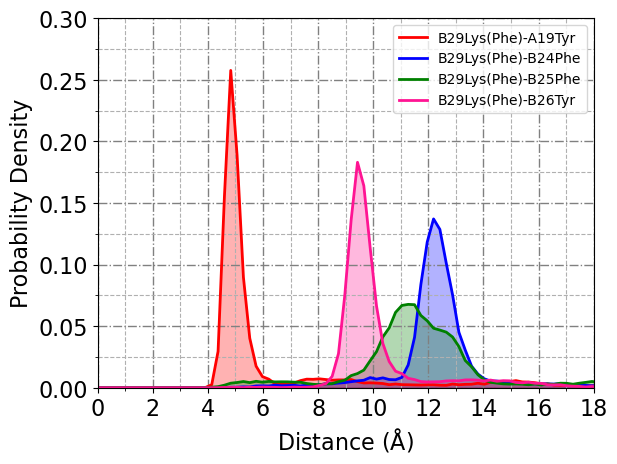

In [71]:
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

print(len(t))
y1 = n1/len(t)
xbins1=bins1[:-1]
y2 = n2/len(t)
xbins2=bins2[:-1]
y3 = n3/len(t)
xbins3=bins3[:-1]
y4 = n4/len(t)
xbins4=bins4[:-1]
#print(n/20000)
#print(bins)
fig, ax = plt.subplots()  
plt.plot(xbins1, y1, ls='solid', color ='red',linewidth=2)
plt.plot(xbins2, y2, ls='solid', color ='blue',linewidth=2)
plt.plot(xbins3, y3, ls='solid', color ='green',linewidth=2)
plt.plot(xbins4, y4, ls='solid', color ='deeppink',linewidth=2)
plt.xticks(np.arange(0.0, 23, 2),fontsize=16)
plt.yticks(np.arange(0.0, 0.31, 0.05),fontsize=16)
plt.xlim(0,18)
plt.ylim(0.0,0.3)
plt.xlabel('Distance ($\mathrm{\AA}$)',fontsize=16)
plt.ylabel('Probability Density',fontsize=16)
ax.fill_between(xbins1,y1,0, alpha=0.3, color='red')
ax.fill_between(xbins2,y2,0, alpha=0.3, color='blue')
ax.fill_between(xbins3,y3,0, alpha=0.3, color='green')
ax.fill_between(xbins4,y4,0, alpha=0.3, color='deeppink')
ax.xaxis.grid(True, which='minor')
ax.xaxis.set_minor_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.025))
plt.grid(color='grey', linestyle='-.', linewidth='1.0')

plt.grid(visible=True, which='minor', linestyle='--')
#plt.title('Aromatic-aromatic interactions\n',
#          fontweight ="bold")
location = 0 # For the best location
location = 0 # For the best location
legend_drawn_flag = True
plt.legend(["B29Lys(Phe)-A19Tyr", "B29Lys(Phe)-B24Phe", "B29Lys(Phe)-B25Phe", "B29Lys(Phe)-B26Tyr"], loc=0, frameon=legend_drawn_flag)
#plt.savefig('com_histo.pdf')

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('com_histo_100bins.jpg', bbox_inches='tight', transparent=True, dpi=600) 
plt.show()


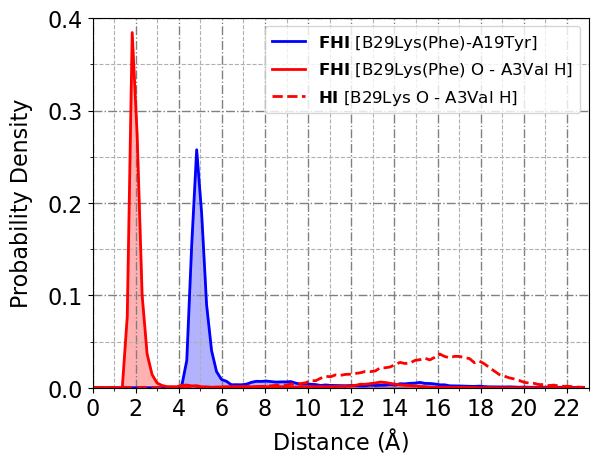

In [73]:
# Run the cell containing line "n1, bins1, patches=plt.hist(dist_data1,range=(0,29),bins=30,color='green')" 
# before running this cell.
legend_properties = {'weight':'bold','size':'14'}
import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots()
y1 = n1/len(t)
xbins1=bins1[:-1]
ax1=ax.plot(xbins1, y1, ls='solid',linewidth=2,color='blue')
ax2=ax.plot(new_xbins2*10, new_y2, ls='solid', color ='r',linewidth=2)
ax22=ax.plot(new_xbins1*10.0, new_y1, ls='dashed', color ='r',linewidth=2)
plt.xticks(np.arange(0.0, 23, 2),fontsize=16)
plt.yticks(np.arange(0.0, 0.50, 0.1),fontsize=16)
plt.xlabel('Distance ($\mathrm{\AA}$)',fontsize=16)
plt.ylabel('Probability Density',fontsize=16)
plt.grid()
plt.xlim(0,23)
plt.ylim(0.0,0.4)
plt.grid(color='grey', linestyle='-.', linewidth='1.0')
ax.yaxis.set_label_coords(-.12, .5)
ax.fill_between(xbins1,y1,0, alpha=0.3, color='b')
ax.fill_between(new_xbins2*10,new_y2,0, alpha=0.3, color='r')
ax.xaxis.grid(True, which='minor')
ax.xaxis.set_minor_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(MultipleLocator(0.05))
#secax = ax.secondary_xaxis('top')
#secax.xaxis.set_minor_locator(MultipleLocator(1.0))
#secax.set_xlabel('$d$ [B29Lys(Phe) O - A3Val H] ($\mathrm{\AA}$)',fontsize=16,color='r',labelpad=8)
#secax.set_xticks(np.arange(0.0, 20, 2),fontsize=16,color='r')
#secax.tick_params(axis='x',labelsize=16,labelcolor='r')
#secax.yaxis.set_label_coords(.5, 50)
plt.legend([r"$\bf{FHI}$ [B29Lys(Phe)-A19Tyr]", r"$\bf{FHI}$ [B29Lys(Phe) O - A3Val H]", r"$\bf{HI}$ [B29Lys O - A3Val H]"], loc=0, frameon=legend_drawn_flag, fontsize='12')
plt.grid(visible=True, which='minor', linestyle='--')

# Create a DataFrame to store the data
data = {
    'Distance': xbins1,
    'Probability Density [B29Lys(Phe)-A19Tyr]': y1,
    'Probability Density [B29Lys(Phe) O-A3Val H]': new_y2,
    'Probability Density [B29Lys O-A3Val H]': new_y1
}

df = pd.DataFrame(data)

# Save the DataFrame to a CSV file
df.to_csv('prob_data.csv', index=False)

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('com_histo_fhi.jpg', bbox_inches='tight', transparent=True, dpi=600)

AttributeError: 'list' object has no attribute 'yaxis'

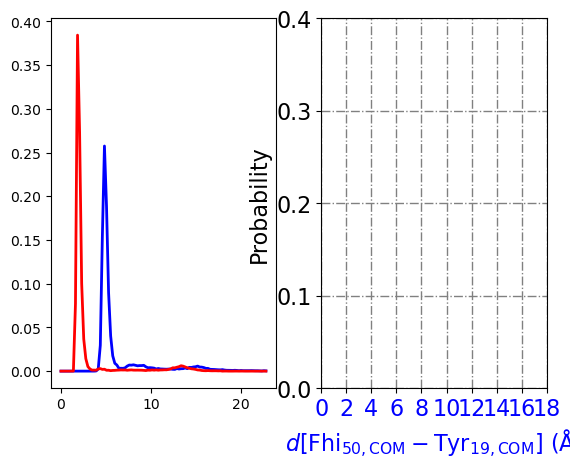

In [73]:
# Run the cell containing line "n1, bins1, patches=plt.hist(dist_data1,range=(0,29),bins=30,color='green')" 
# before running this cell.

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
fig, ax = plt.subplots(1,2)
y1 = n1/len(t)
xbins1=bins1[:-1]
ax[0].plot(xbins1, y1, ls='solid', color ='blue',linewidth=2)
ax[0].plot(new_xbins2*10, new_y2, ls='solid', color ='r',linewidth=2)
#ax[1].
plt.xticks(np.arange(0.0, 20, 2),fontsize=16,color='blue')
plt.yticks(np.arange(0.0, 0.50, 0.1),fontsize=16)
plt.xlabel('$d[\mathrm{Fhi_{50,COM}-Tyr_{19,COM}}]}$ ($\mathrm{\AA}$)',fontsize=16,color='blue')
plt.ylabel('Probability',fontsize=16)
plt.grid()
plt.xlim(0,18)
plt.ylim(0.0,0.4)
plt.grid(color='grey', linestyle='-.', linewidth='1.0')
ax1.yaxis.set_label_coords(-.12, .5)
ax1.fill_between(xbins1,y1,0, alpha=0.3, color='b')
ax1.fill_between(new_xbins2*10,new_y2,0, alpha=0.3, color='r')
ax1.xaxis.grid(True, which='minor')
ax1.xaxis.set_minor_locator(MultipleLocator(1.0))
ax1.yaxis.set_minor_locator(MultipleLocator(0.05))
secax = ax.secondary_xaxis('top')
secax.xaxis.set_minor_locator(MultipleLocator(1.0))
secax.set_xlabel('$d[\mathrm{Fhi_{50}O-Val_3H]}$ ($\mathrm{\AA}$)',fontsize=16,color='r',labelpad=8)
secax.set_xticks(np.arange(0.0, 20, 2),fontsize=16,color='r')
secax.tick_params(axis='x',labelsize=16,labelcolor='r')
secax.yaxis.set_label_coords(.5, 50)
plt.grid(visible=True, which='minor', linestyle='--')

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('1_2.jpg', bbox_inches='tight', transparent=True, dpi=600)

22866


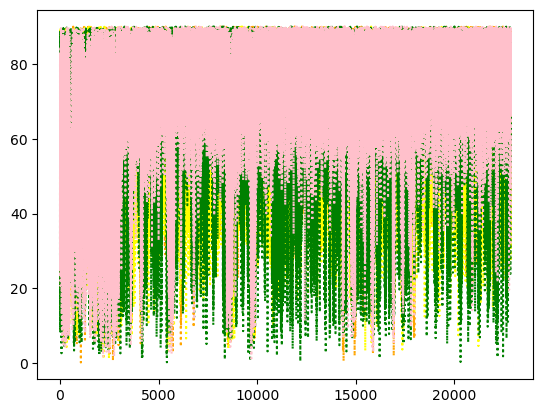

In [74]:
# Python program to find equation of a plane
# passing through given 3 points.

# Function to find equation of plane.
def equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3):
	
	a1 = x2 - x1
	b1 = y2 - y1
	c1 = z2 - z1
	a2 = x3 - x1
	b2 = y3 - y1
	c2 = z3 - z1
	a = b1 * c2 - b2 * c1
	b = a2 * c1 - a1 * c2
	c = a1 * b2 - b1 * a2
	d = (- a * x1 - b * y1 - c * z1)
	#print(a,b,c,d)
	return a,b,c,d
	#print("equation of plane is ",) 
	#print(a, "x +",b, "y +",c, "z +",d, "= 0.") 

# Python3 program for the above approach
import math

# Function to find the angle
# between the two lines
def calculateAngle(a1, b1, c1,
				a2, b2, c2):

	# Find the dotProduct
	# of lines AB & BC
	dotProduct = (a1 * a2 +
				b1 * b2 +
				c1 * c2);

	# Find magnitude of
	# line AB and BC
	magnitudeAB = (a1 * a1 +
				b1 * b1 +
				c1 * c1);
	magnitudeBC = (a2 * a2 +
				b2 * b2 +
				c2 * c2);

	# Find the cosine of
	# the angle formed
	# by line AB and BC
	angle = dotProduct;
	angle /= math.sqrt(magnitudeAB *
					magnitudeBC);
	angle =np.arccos(angle)

	# Find angle in radian
	angle = (angle * 180) / 3.14;
	if angle>90:
		angle=abs(180-angle)
	return angle
	# Print angle
	#print(round(abs(angle), 4))

# Driver Code

atom_fhi50=t.topology.select('index 784 787 791')
atom_tyr19=t.topology.select('index 275 278 283')
atom_tyr47=t.topology.select('index 713 716 721')
atom_phe46=t.topology.select('index 693 696 700')
atom_phe45=t.topology.select('index 673 676 680')
angle_tyr19=[]
angle_tyr47=[]
angle_phe46=[]
angle_phe45=[]
print(len(t))
for i in range(len(t)):
    [[x1,y1,z1],[x2,y2,z2],[x3,y3,z3]]=t.xyz[i,atom_fhi50,:]  # frame_index, atom_index, dimension(like x,y,z)
    a1,b1,c1,d1=equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3) 
    [[x1,y1,z1],[x2,y2,z2],[x3,y3,z3]]=t.xyz[i,atom_tyr19,:]  # frame_index, atom_index, dimension(like x,y,z)
    a2,b2,c2,d2=equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3)
    angle=calculateAngle(a1,b1,c1,a2,b2,c2);
    angle_tyr19.append(angle)
for i in range(len(t)):
    [[x1,y1,z1],[x2,y2,z2],[x3,y3,z3]]=t.xyz[i,atom_fhi50,:]  # frame_index, atom_index, dimension(like x,y,z)
    a1,b1,c1,d1=equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3) 
    [[x1,y1,z1],[x2,y2,z2],[x3,y3,z3]]=t.xyz[i,atom_tyr47,:]  # frame_index, atom_index, dimension(like x,y,z)
    a2,b2,c2,d2=equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3)
    angle=calculateAngle(a1,b1,c1,a2,b2,c2);
    angle_tyr47.append(angle)
for i in range(len(t)):
    [[x1,y1,z1],[x2,y2,z2],[x3,y3,z3]]=t.xyz[i,atom_fhi50,:]  # frame_index, atom_index, dimension(like x,y,z)
    a1,b1,c1,d1=equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3) 
    [[x1,y1,z1],[x2,y2,z2],[x3,y3,z3]]=t.xyz[i,atom_phe46,:]  # frame_index, atom_index, dimension(like x,y,z)
    a2,b2,c2,d2=equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3)
    angle=calculateAngle(a1,b1,c1,a2,b2,c2);
    angle_phe46.append(angle)
for i in range(len(t)):
    [[x1,y1,z1],[x2,y2,z2],[x3,y3,z3]]=t.xyz[i,atom_fhi50,:]  # frame_index, atom_index, dimension(like x,y,z)
    a1,b1,c1,d1=equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3) 
    [[x1,y1,z1],[x2,y2,z2],[x3,y3,z3]]=t.xyz[i,atom_phe45,:]  # frame_index, atom_index, dimension(like x,y,z)
    a2,b2,c2,d2=equation_plane(x1, y1, z1, x2, y2, z2, x3, y3, z3)
    angle=calculateAngle(a1,b1,c1,a2,b2,c2);
    angle_phe45.append(angle)
#print(angle_tyr19)
plt.plot(angle_tyr19,ls='dotted',color='orange')
plt.plot(angle_tyr47,ls='dotted',color='yellow')
plt.plot(angle_phe46,ls='dotted',color='green')
plt.plot(angle_phe45,ls='dotted',color='pink')

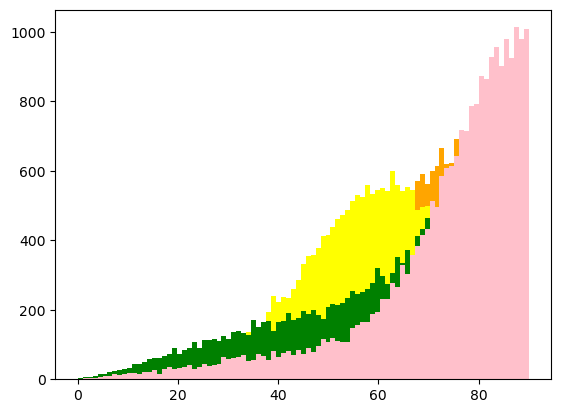

In [75]:
n1, bins1, patches=plt.hist(angle_tyr19,range=(0,90),bins=91,color='orange')
n2, bins2, patches=plt.hist(angle_tyr47,range=(0,90),bins=91,color='yellow')
n3, bins3, patches=plt.hist(angle_phe46,range=(0,90),bins=91,color='green')
n4, bins4, patches=plt.hist(angle_phe45,range=(0,90),bins=91,color='pink')

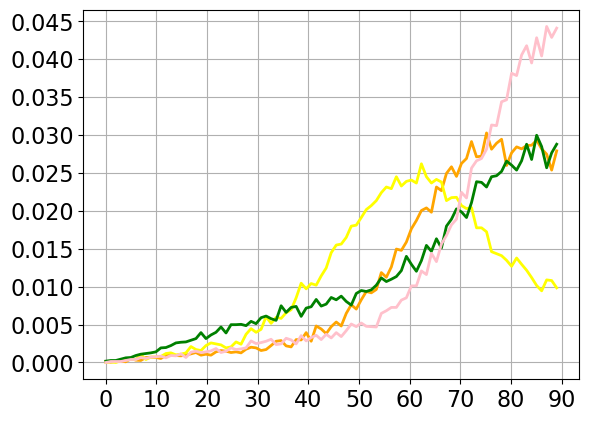

In [76]:
y1 = n1/len(t)
xbins1=bins1[:-1]
y2 = n2/len(t)
xbins2=bins1[:-1]
y3 = n3/len(t)
xbins3=bins1[:-1]
y4 = n4/len(t)
xbins4=bins1[:-1]

plt.plot(xbins1, y1, ls='solid', color ='orange',linewidth=2)
plt.plot(xbins2, y2, ls='solid', color ='yellow',linewidth=2)
plt.plot(xbins3, y3, ls='solid', color ='green',linewidth=2)
plt.plot(xbins4, y4, ls='solid', color ='pink',linewidth=2)
plt.xticks(np.arange(0.0, 100.0, 10),fontsize=16)
plt.yticks(np.arange(0.000, 0.050, 0.005),fontsize=16)
plt.grid()

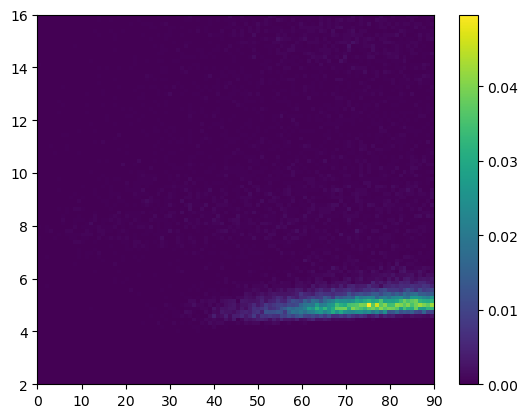

In [77]:
plt.hist2d(angle_tyr19,dist_data1,bins=(100, 100),range=([0,90],[2,16]),density=True)
plt.colorbar()

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('colorbar.eps')

<Figure size 640x480 with 0 Axes>

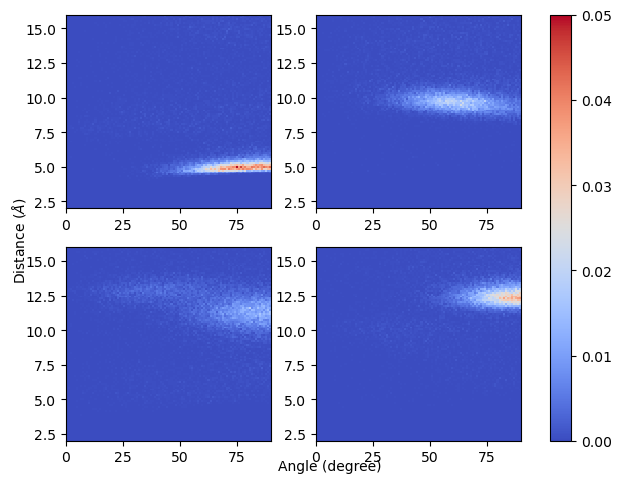

In [78]:
import matplotlib.colorbar
import matplotlib.cm as cm

from mpl_toolkits.axes_grid1 import make_axes_locatable
figure(figsize=(8, 6), dpi=80)
fig, ax = plt.subplots(2,2)
cmap = cm.coolwarm
#norm=cm.colors.Normalize(vmin =0, vmax =0.1)

fig.text(0.0, 0.5, 'Distance ($\AA$)', va='center', rotation='vertical')
fig.text(0.5, 0.02, 'Angle (degree)', ha='center', rotation='horizontal')

im1=ax[0,0].hist2d(angle_tyr19,dist_data1,bins=(100, 100),range=([0,90],[2,16]),vmin=0.0,vmax=0.05,density=True,cmap=cmap)
im2=ax[0,1].hist2d(angle_tyr47,dist_data2,bins=(100, 100),range=([0,90],[2,16]),vmin=0.0,vmax=0.05,density=True,cmap=cmap)
im3=ax[1,0].hist2d(angle_phe46,dist_data3,bins=(100, 100),range=([0,90],[2,16]),vmin=0.0,vmax=0.05,density=True,cmap=cmap)
im4=ax[1,1].hist2d(angle_phe45,dist_data4,bins=(100, 100),range=([0,90],[2,16]),vmin=0.0,vmax=0.05,density=True,cmap=cmap)
fig.tight_layout()
#vmin,vmax =im1[-1].get_clim() #Check vmin and vmax for all the plots. Select the highest value of vmax.
#print('\n',vmin,vmax,'\n')
#vmin,vmax =0.0,0.05
cbar=fig.colorbar(im4[3],ax=ax)

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('angle.eps')

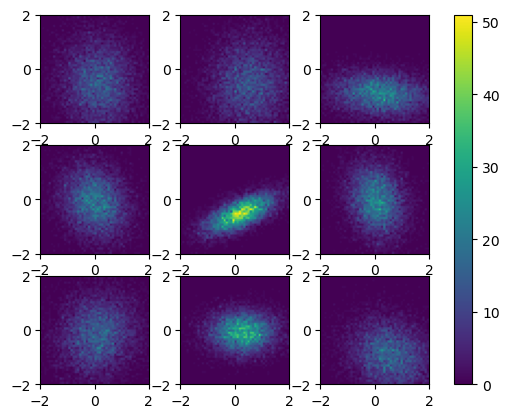

In [79]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec as gs
from scipy.stats import multivariate_normal

##opening figure and axes
nrows=3
ncols=3
fig, axes = plt.subplots(nrows,ncols)

##generate some random data for the distributions
means = np.random.rand(nrows,ncols,2)
sigmas = np.random.rand(nrows,ncols,2)
thetas = np.random.rand(nrows,ncols)*np.pi*2

##produce the actual data and compute the histograms
mappables=[]
for mean,sigma,theta in zip(means.reshape(-1,2), sigmas.reshape(-1,2), thetas.reshape(-1)):

    ##the data (only cosmetics):    
    c, s = np.cos(theta), np.sin(theta)
    rot = np.array(((c,-s), (s, c)))
    cov = rot@np.diag(sigma)@rot.T
    rv = multivariate_normal(mean,cov)
    data = rv.rvs(size = 10000)

    ##the 2d histogram from numpy
    H,xedges,yedges = np.histogram2d(data[:,0], data[:,1], bins=50, range=[[-2, 2],[-2, 2]])

    mappables.append(H)

##the min and max values of all histograms
vmin = np.min(mappables)
vmax = np.max(mappables)

##second loop for visualisation
for ax,H in zip(axes.ravel(),mappables):
    im = ax.imshow(H,vmin=vmin, vmax=vmax, extent=[-2,2,-2,2])

##colorbar using solution from linked question
fig.colorbar(im,ax=axes.ravel())

plt.show()

In [80]:
# Python3 program for the above approach
import math

# Function to find the angle
# between the two lines
def calculateAngle(a1, b1, c1,
				a2, b2, c2):

	# Find the dotProduct
	# of lines AB & BC
	dotProduct = (a1 * a2 +
				b1 * b2 +
				c1 * c2);

	# Find magnitude of
	# line AB and BC
	magnitudeAB = (a1 * a1 +
				b1 * b1 +
				c1 * c1);
	magnitudeBC = (a2 * a2 +
				b2 * b2 +
				c2 * c2);

	# Find the cosine of
	# the angle formed
	# by line AB and BC
	angle = dotProduct;
	angle /= math.sqrt(magnitudeAB *
					magnitudeBC);

	# Find angle in radian
	angle = (angle * 180) / 3.14;

	# Print angle
	print(round(abs(angle), 4))

# Driver Code
if __name__=='__main__':

	# Given coordinates
	# Points A
	a1, b1, c1 = -0.016958177, -0.01828755, 0.02475604;

	# Points B
	a2, b2, c2 = -0.04273508, -0.029012127, 0.009757742;

	# Function Call
	calculateAngle(a1,b1,c1,a2,b2,c2);

46.4513


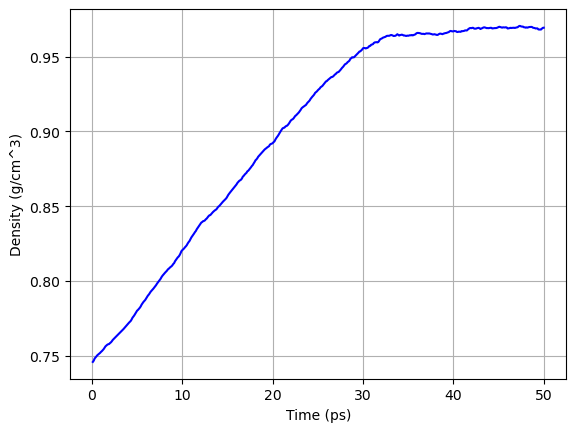

In [8]:
# Density of NPT equilibration
t_npt=md.load('02_npt1/center.nc', top='solvated_2jv1.prmtop')
density=md.density(t_npt, masses=None)
i=0.0
k=0
time_data=[]
den_data=[]
for x in density:
    i= i+1
    k= k+1
    j= i/10.0
    #print(k)
    time_i=j
    den_i=x/1000.0
    time_data.append(time_i)
    den_data.append(den_i)
plt.plot(time_data,den_data,ls='solid',color='blue')
plt.xlabel('Time (ps)')
plt.ylabel('Density (g/cm^3)')
plt.grid()

# I have commented the below line just because I don't want to modify the existing images.
#plt.savefig('density.pdf')

In [6]:
%%time
# load modules
import mdtraj as md
import pytraj as pt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
#this makes your plot print in the jupyter notebook

#load trajectories
t=md.load('data1/center.h5', top='solvated_2jv1.prmtop')
t.superpose(t, 0)

#define a function for labeling hydrogen bonds

def label(hbond):
    hbond_label = '%s -%s- %s' % (t.topology.atom(hbond[0]), t.topology.atom(hbond[1]), t.topology.atom(hbond[2]))
    return hbond_label

# specify the protein
protein_sel1 = t.topology.select('protein')
n_frames = len(t)
#print(n_frames)

# This set will give us all of the unique hbonds that are made with the ligand, without repeats
# We will want to have this later so we make it not to avoid repeating hbond calculation 
all_hbonds_set = set()
# This list will store all of the hbonds made per frame
hbonds_each_frame = []

# We want to create a dictionary containing every frame and the ligand hbonds which occur in that frame
Frame2hbond = {}
for frame in range(n_frames):
    # The dictionary "words" are the frame number
    Frame2hbond[frame] = [] 
    # We are doing the hbond analysis frame by frame
    hbonds = md.baker_hubbard(t[frame]) 
    hbonds_each_frame.append(hbonds)
    # We only care about the hbonds if they involve the ligand 
    for hbond in hbonds:
        if ((hbond[0] in protein_sel1) and (hbond[2] in protein_sel1)):          
            all_hbonds_set.add(tuple(hbond))
            # The dictionary "definitions" are all the hbonds in that frame
            Frame2hbond[frame].append(tuple(hbond))  



/home/shivaniv/anaconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


CPU times: user 43min 8s, sys: 6.88 s, total: 43min 14s
Wall time: 43min 15s


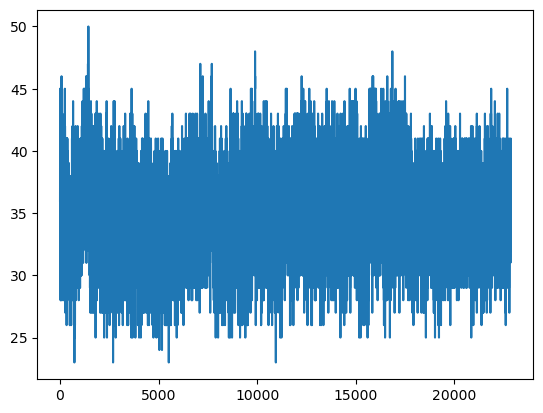

In [16]:
# plot the total number of hydrogen bonds per frame
x = [] # these are all the frames
y = [] # this is the total number of hbonds in that frame 
for frame in Frame2hbond:
    x.append(frame)
    y.append((len(Frame2hbond[frame])))

## Make your own pretty plot based on the matplotlib skills you've learned.
## Change the size, resolution, color, and make sure to label axes and give the plot a title! 
plt.plot(x,y)
#plt.savefig('figure_name.png')
plt.show()



In [8]:
%%time
# load modules
#import mdtraj as md
import pytraj as pt
#import numpy as np
#import matplotlib.pyplot as plt
#%matplotlib inline 
#this makes your plot print in the jupyter notebook

#load trajectories
t_hi=md.load('../hi/data/center.h5', top='../hi/data/solvated_2jv1.prmtop')
t_hi.superpose(t_hi, 0)

#define a function for labeling hydrogen bonds

def label(hbond):
    hbond_label = '%s -%s- %s' % (t_hi.topology.atom(hbond[0]), t_hi.topology.atom(hbond[1]), t_hi.topology.atom(hbond[2]))
    return hbond_label

# specify the protein
protein_sel2 = t_hi.topology.select('protein')
n_frames = len(t_hi)
#print(n_frames)

# This set will give us all of the unique hbonds that are made with the ligand, without repeats
# We will want to have this later so we make it not to avoid repeating hbond calculation 
all_hbonds_set = set()
# This list will store all of the hbonds made per frame
hbonds_each_frame = []

# We want to create a dictionary containing every frame and the ligand hbonds which occur in that frame
#Frame2hbond = {}
#for frame in range(n_frames):
    # The dictionary "words" are the frame number
    #Frame2hbond[frame] = [] 
    # We are doing the hbond analysis frame by frame
    #hbonds = md.baker_hubbard(t_hi[frame]) 
    #hbonds_each_frame.append(hbonds)
    # We only care about the hbonds if they involve the ligand 
    #for hbond in hbonds:
    #    if ((hbond[0] in protein_sel2) and (hbond[2] in protein_sel2)):          
     #       all_hbonds_set.add(tuple(hbond))
            # The dictionary "definitions" are all the hbonds in that frame
     #       Frame2hbond[frame].append(tuple(hbond))  

/home/shivaniv/anaconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


CPU times: user 24.6 s, sys: 4.53 s, total: 29.1 s
Wall time: 40.8 s


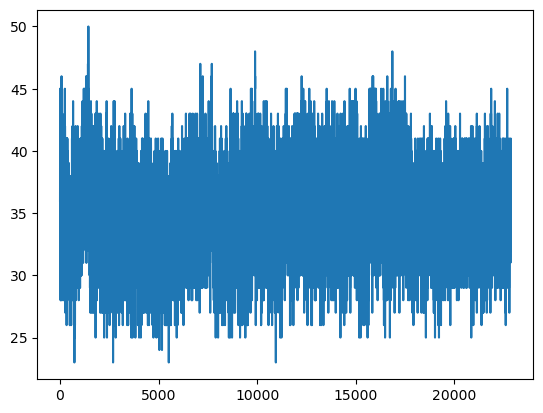

In [26]:
x = [] # these are all the frames
y = [] # this is the total number of hbonds in that frame 
for frame in Frame2hbond:
    x.append(frame)
    y.append((len(Frame2hbond[frame])))


## Make your own pretty plot based on the matplotlib skills you've learned.
## Change the size, resolution, color, and make sure to label axes and give the plot a title! 
plt.plot(x,y)
#plt.savefig('figure_name.png')
plt.show()


In [9]:
%%time
# We want to create a dictionary containing every frame and the ligand hbonds which occur in that frame
Frame2hbond_hi = {}
for frame in range(n_frames):
    # The dictionary "words" are the frame number
    Frame2hbond_hi[frame] = [] 
    # We are doing the hbond analysis frame by frame
    hbonds = md.baker_hubbard(t_hi[frame]) 
    hbonds_each_frame.append(hbonds)
    # We only care about the hbonds if they involve the ligand 
    for hbond in hbonds:
        if ((hbond[0] in protein_sel2) and (hbond[2] in protein_sel2)):          
            all_hbonds_set.add(tuple(hbond))
            # The dictionary "definitions" are all the hbonds in that frame
            Frame2hbond_hi[frame].append(tuple(hbond))  

CPU times: user 39min 37s, sys: 652 ms, total: 39min 37s
Wall time: 39min 37s


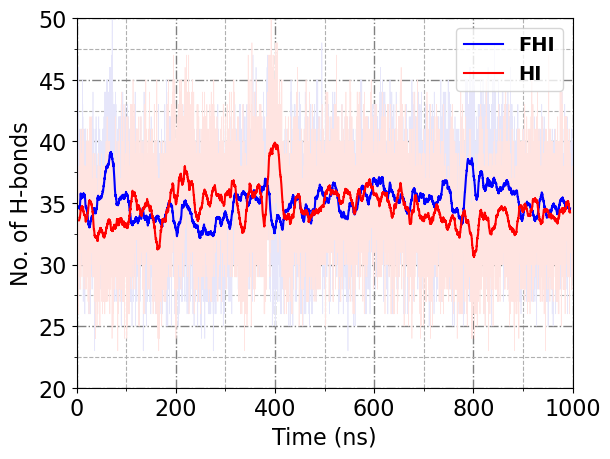

In [12]:
from __future__ import division
import matplotlib.pyplot as plt
from pylab import plot, ylim, xlim, show, xlabel, ylabel, grid
from numpy import linspace, loadtxt, ones, convolve
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

legend_properties = {'weight':'bold','size':'14'}
legend_drawn_flag = True
fig, ax = plt.subplots()

x = [] # these are all the frames
y = [] # this is the total number of hbonds in that frame 
for frame in Frame2hbond:
    x.append(frame)
    y.append((len(Frame2hbond[frame])))
y_av = movingaverage(y, 200)

x1 = [] # these are all the frames
y1 = [] # this is the total number of hbonds in that frame 
for frame in Frame2hbond_hi:
    x1.append(frame)
    y1.append((len(Frame2hbond_hi[frame])))

y1_av = movingaverage(y1, 200)

## Make your own pretty plot based on the matplotlib skills you've learned.
## Change the size, resolution, color, and make sure to label axes and give the plot a title! 
#plt.plot(x,y,ls='dotted')
#plt.plot(x1,y1,ls='dotted',color='orange')

#plt.savefig('hbond.pdf')
file = open('hbond_fhi.dat','w')

for item in y:
    file.write(str(item)+"\n")
file.close()

file = open('hbond_hi.dat','w')

for item in y1:
    file.write(str(item)+"\n")
file.close()

i=0.0
#k=0
time_data=[]
#rmsd_data=[]
for i in x:
    i= i+1
    #k= k+1
    j= i/20.0
    #print(k)
    time_i=j
    #rmsd_i=x
    time_data.append(time_i)

i=0.0
#k=0
time_data_hi=[]
#rmsd_data=[]
for i in x1:
    i= i+1
    #k= k+1
    j= i/20.0
    #print(k)
    time_i=j
    #rmsd_i=x
    time_data_hi.append(time_i)

plt.xticks(np.arange(0, 1200, 200),fontsize=16)
plt.yticks(np.arange(20, 55, 5),fontsize=16)
ax.xaxis.grid(True, which='minor')
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(2.5))
plt.grid(color='grey', linestyle='-.', linewidth='1.0')
plt.grid(visible=True, which='minor', linestyle='--')
plt.plot(time_data,y,ls='solid',linewidth='0.5', color='lavender')
plt.plot(time_data_hi,y1,ls='solid',linewidth='0.5', color='mistyrose')
plt.plot(time_data[100:19900],y_av[100:19900],ls='solid', color='blue',label="FHI")
plt.plot(time_data_hi[100:19900],y1_av[100:19900],ls='solid', color='red',label="HI")
plt.xlabel('Time (ns)',fontsize=16)
plt.ylabel('No. of H-bonds',fontsize=16)
plt.xlim(0,1000)
plt.ylim(20,50)
plt.legend(loc='upper right',frameon=legend_drawn_flag,prop=legend_properties)
#plt.show()
plt.savefig('hbond.jpg', bbox_inches='tight', transparent=True, dpi=600)

<Figure size 1280x960 with 0 Axes>

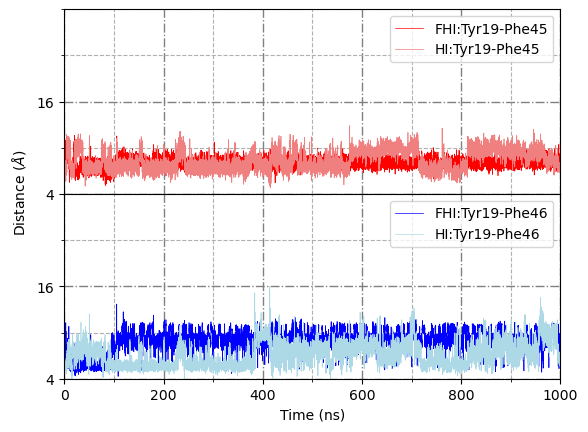

In [167]:
import math
from matplotlib.pyplot import figure
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
protein_sel=t.topology.select('resid 0 to 50')
protein_traj=t.atom_slice(protein_sel)

protein_sel2 = t_hi.topology.select('resid 0 to 50')
protein_traj2=t.atom_slice(protein_sel2)

#FHI 50 COM FHI
fhi50_sel=t.topology.select('index 784 785 787 789 791 793')
fhi50_traj=t.atom_slice(fhi50_sel)
fhi50_com=md.compute_center_of_mass(fhi50_traj)

#TYR 19 COM FHI
tyr19_sel=t.topology.select('index 275 276 278 280 283 285')
tyr19_traj=t.atom_slice(tyr19_sel)
tyr19_com=md.compute_center_of_mass(tyr19_traj)
#TYR 19 COM HI
tyr19_sel=t_hi.topology.select('index 275 276 278 280 283 285')
tyr19_traj=t_hi.atom_slice(tyr19_sel)
tyr19_com_hi=md.compute_center_of_mass(tyr19_traj)

#PHE22 COM FHI
phe22_sel=t.topology.select('index 323 324 326 328 330 332')
phe22_traj=t.atom_slice(phe22_sel)
phe22_com=md.compute_center_of_mass(phe22_traj)
#PHE22 COM HI
phe22_sel=t_hi.topology.select('index 323 324 326 328 330 332')
phe22_traj=t_hi.atom_slice(phe22_sel)
phe22_com_hi=md.compute_center_of_mass(phe22_traj)

#HIP26 COM FHI
hip26_sel=t.topology.select('index 390 391 393 395 397')
hip26_traj=t.atom_slice(hip26_sel)
hip26_com=md.compute_center_of_mass(hip26_traj)
#HIP26 COM HI
hip26_sel=t_hi.topology.select('index 390 391 393 395 397')
hip26_traj=t_hi.atom_slice(hip26_sel)
hip26_com_hi=md.compute_center_of_mass(hip26_traj)

#HIP31 COM FHI
hip31_sel=t.topology.select('index 455 456 458 460 462')
hip31_traj=t.atom_slice(hip31_sel)
hip31_com=md.compute_center_of_mass(hip31_traj)
#HIP31 COM HI
hip31_sel=t_hi.topology.select('index 455 456 458 460 462')
hip31_traj=t_hi.atom_slice(hip31_sel)
hip31_com_hi=md.compute_center_of_mass(hip31_traj)

#TYR 37 COM FHI
tyr37_sel=t.topology.select('index 553 554 556 558 561 563')
tyr37_traj=t.atom_slice(tyr37_sel)
tyr37_com=md.compute_center_of_mass(tyr37_traj)
#TYR 37 COM HI
tyr37_sel=t_hi.topology.select('index 553 554 556 558 561 563')
tyr37_traj=t_hi.atom_slice(tyr37_sel)
tyr37_com_hi=md.compute_center_of_mass(tyr37_traj)

#TYR 47 COM FHI
tyr47_sel=t.topology.select('index 713 714 716 718 721 723')
tyr47_traj=t.atom_slice(tyr47_sel)
tyr47_com=md.compute_center_of_mass(tyr47_traj)
#TYR 47 COM HI
tyr47_sel=t_hi.topology.select('index 713 714 716 718 721 723')
tyr47_traj=t_hi.atom_slice(tyr47_sel)
tyr47_com_hi=md.compute_center_of_mass(tyr47_traj)

#PHE 46 COM FHI
phe46_sel=t.topology.select('index 693 694 696 698 700 702')
phe46_traj=t.atom_slice(phe46_sel)
phe46_com=md.compute_center_of_mass(phe46_traj)
#fhi50_phe46=fhi50_com-phe46_com
#PHE 46 COM HI
phe46_sel=t_hi.topology.select('index 693 694 696 698 700 702')
phe46_traj=t_hi.atom_slice(phe46_sel)
phe46_com_hi=md.compute_center_of_mass(phe46_traj)

#PHE 45 COM FHI
phe45_sel=t.topology.select('index 673 674 676 678 680 682')
phe45_traj=t.atom_slice(phe45_sel)
phe45_com=md.compute_center_of_mass(phe45_traj)
#fhi50_phe45=fhi50_com-phe45_com
#PHE 45 COM HI
phe45_sel=t_hi.topology.select('index 673 674 676 678 680 682')
phe45_traj=t_hi.atom_slice(phe45_sel)
phe45_com_hi=md.compute_center_of_mass(phe45_traj)
#fhi50_phe45=fhi50_com-phe45_com

i=0.0
k=0
time_data=[]
time_data_hi=[]
dist_data1=[]
dist_data1_hi=[]
dist_data2=[]
dist_data2_hi=[]
dist_data3=[]
dist_data3_hi=[]
dist_data4=[]
dist_data4_hi=[]
dist_data5=[]
dist_data5_hi=[]
dist_data6=[]
dist_data6_hi=[]
dist_data7=[]
dist_data7_hi=[]
dist_data8=[]
dist_data8_hi=[]
dist_data9=[]
dist_data9_hi=[]
dist_data10=[]
dist_data10_hi=[]
dist_data11=[]
dist_data11_hi=[]
dist_data12=[]
dist_data12_hi=[]
dist_data13=[]
dist_data13_hi=[]
x=[]
y=[]

for (coord_1,coord_2) in zip(tyr19_com,phe45_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    time_data.append(time_i)
    dist_data1.append(dist_i)
    #print(dist_data1)


i=0.0
for (coord_1,coord_2) in zip(tyr19_com_hi,phe45_com_hi):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    time_i=j        
    time_data_hi.append(time_i)
    dist_data1_hi.append(dist_i)
    
for (coord_1,coord_2) in zip(tyr19_com,phe46_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data2.append(dist_i)

for (coord_1,coord_2) in zip(tyr19_com_hi,phe46_com_hi):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data2_hi.append(dist_i)

for (coord_1,coord_2) in zip(tyr19_com,tyr47_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data3.append(dist_i)

for (coord_1,coord_2) in zip(tyr19_com_hi,tyr47_com_hi):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data3_hi.append(dist_i)

for (coord_1,coord_2) in zip(phe22_com,hip31_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data4.append(dist_i)

for (coord_1,coord_2) in zip(phe22_com_hi,hip31_com_hi):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data4_hi.append(dist_i)

for (coord_1,coord_2) in zip(hip26_com,phe22_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data5.append(dist_i)

for (coord_1,coord_2) in zip(hip26_com_hi,phe22_com_hi):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data5_hi.append(dist_i)

for (coord_1,coord_2) in zip(hip26_com,hip31_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data6.append(dist_i)

for (coord_1,coord_2) in zip(hip26_com_hi,hip31_com_hi):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data6_hi.append(dist_i)

for (coord_1,coord_2) in zip(hip31_com,tyr19_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data7.append(dist_i)

for (coord_1,coord_2) in zip(hip31_com_hi,tyr19_com_hi):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data7_hi.append(dist_i)

for (coord_1,coord_2) in zip(hip31_com,tyr47_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data8.append(dist_i)

for (coord_1,coord_2) in zip(hip31_com_hi,tyr47_com_hi):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data8_hi.append(dist_i)

for (coord_1,coord_2) in zip(tyr37_com,phe45_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data9.append(dist_i)

for (coord_1,coord_2) in zip(tyr37_com_hi,phe45_com_hi):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data9_hi.append(dist_i)

for (coord_1,coord_2) in zip(phe45_com,fhi50_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data10.append(dist_i)

for (coord_1,coord_2) in zip(fhi50_com,tyr19_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data11.append(dist_i)

for (coord_1,coord_2) in zip(tyr47_com,fhi50_com):
    #print(coord_fhi,coord_tyr)
    a=[]
    b=[]
    for (x,y) in zip(coord_1,coord_2):
        a.append(x)
        b.append(y)
    #print(a,b)
    dist_i=10.0*(math.dist(a,b))
    i= i+1
    k= k+1
    j= i/20.0
    #print(dist_data)
    time_i=j        
    #time_data.append(time_i)
    dist_data12.append(dist_i)

figure(figsize=(16, 12), dpi=80)
fig, ax = plt.subplots(2)
fig.subplots_adjust(hspace=0)
ax[0].grid(color='grey', linestyle='-.', linewidth='1.0')
ax[1].grid(color='grey', linestyle='-.', linewidth='1.0')
#ax[2].grid(color='grey', linestyle='-.', linewidth='1.0')
#ax[3].grid(color='grey', linestyle='-.', linewidth='1.0')
#ax[4].grid(color='grey', linestyle='-.', linewidth='1.0')
#ax[5].grid(color='grey', linestyle='-.', linewidth='1.0')
#ax[6].grid(color='grey', linestyle='-.', linewidth='1.0')
#ax[7].grid(color='grey', linestyle='-.', linewidth='1.0')
#ax[8].grid(color='grey', linestyle='-.', linewidth='1.0')
#ax[9].grid(color='grey', linestyle='-.', linewidth='1.0')
#ax[10].grid(color='grey', linestyle='-.', linewidth='1.0')
#ax[11].grid(color='grey', linestyle='-.', linewidth='1.0')
plt.xlabel('Time (ns)')
ax[0].set_xlim(0,1000)
ax[0].set_ylim(4,28)
ax[1].set_xlim(0,1000)
ax[1].set_ylim(4,28)
#ax[2].set_xlim(0,1000)
#ax[2].set_ylim(4,28)
#ax[3].set_xlim(0,1000)
#ax[3].set_ylim(4,28)
#ax[4].set_xlim(0,1000)
#ax[4].set_ylim(4,28)
#ax[5].set_xlim(0,1000)
#ax[5].set_ylim(4,28)
#ax[6].set_xlim(0,1000)
#ax[6].set_ylim(4,28)
#ax[7].set_xlim(0,1000)
#ax[7].set_ylim(4,28)
#ax[8].set_xlim(0,1000)
#ax[8].set_ylim(4,28)
#ax[9].set_xlim(0,1000)
#ax[9].set_ylim(4,28)
#ax[10].set_xlim(0,1000)
#ax[10].set_ylim(4,28)
#ax[11].set_xlim(0,1000)
#ax[11].set_ylim(4,28)

fig.text(0.04, 0.5, 'Distance ($\AA$)', va='center', rotation='vertical')
ax[0].set_xticklabels([])
#ax[1].set_xticklabels([])
#ax[2].set_xticklabels([])
#ax[3].set_xticklabels([])
#ax[4].set_xticklabels([])
#ax[5].set_xticklabels([])
#ax[6].set_xticklabels([])
#ax[7].set_xticklabels([])
#ax[8].set_xticklabels([])
#ax[9].set_xticklabels([])
#ax[10].set_xticklabels([])
ax[1].set_xticks(np.arange(0, 1200, 200))
ax[0].set_yticks(np.arange(4, 28, 12))
ax[1].set_yticks(np.arange(4, 28, 12))
#ax[2].set_yticks(np.arange(4, 28, 12))
#ax[3].set_yticks(np.arange(4, 28, 12))
#ax[4].set_yticks(np.arange(4, 28, 12))
#ax[5].set_yticks(np.arange(4, 28, 12))
#ax[6].set_yticks(np.arange(4, 28, 12))
#ax[7].set_yticks(np.arange(4, 28, 12))
#ax[8].set_yticks(np.arange(4, 28, 12))
#ax[9].set_yticks(np.arange(4, 28, 12))
#ax[10].set_yticks(np.arange(4, 28, 12))
#ax[11].set_yticks(np.arange(4, 28, 12))
ax[0].grid(True)
ax[1].grid(True)
#ax[2].grid(True)
#ax[3].grid(True)
#ax[4].grid(True)
#ax[5].grid(True)
#ax[6].grid(True)
#ax[7].grid(True)
#ax[8].grid(True)
#ax[9].grid(True)
#ax[10].grid(True)
#ax[11].grid(True)

minor_locator = AutoMinorLocator(2)
ax[0].yaxis.set_minor_locator(minor_locator)
ax[1].yaxis.set_minor_locator(minor_locator)
#ax[2].yaxis.set_minor_locator(minor_locator)
#ax[3].yaxis.set_minor_locator(minor_locator)
#ax[4].yaxis.set_minor_locator(minor_locator)
#ax[5].yaxis.set_minor_locator(minor_locator)
#ax[6].yaxis.set_minor_locator(minor_locator)
#ax[7].yaxis.set_minor_locator(minor_locator)
#ax[8].yaxis.set_minor_locator(minor_locator)
#ax[9].yaxis.set_minor_locator(minor_locator)
#ax[10].yaxis.set_minor_locator(minor_locator)
#ax[11].yaxis.set_minor_locator(minor_locator)
ax[0].xaxis.set_minor_locator(MultipleLocator(100))
ax[1].xaxis.set_minor_locator(MultipleLocator(100))
#ax[2].xaxis.set_minor_locator(MultipleLocator(100))
#ax[3].xaxis.set_minor_locator(MultipleLocator(100))
#ax[4].xaxis.set_minor_locator(MultipleLocator(100))
#ax[5].xaxis.set_minor_locator(MultipleLocator(100))
#ax[6].xaxis.set_minor_locator(MultipleLocator(100))
#ax[7].xaxis.set_minor_locator(MultipleLocator(100))
#ax[8].xaxis.set_minor_locator(MultipleLocator(100))
#ax[9].xaxis.set_minor_locator(MultipleLocator(100))
#ax[10].xaxis.set_minor_locator(MultipleLocator(100))
#ax[11].xaxis.set_minor_locator(MultipleLocator(100))

ax[0].grid(visible=True, which='minor', linestyle='--')
ax[1].grid(visible=True, which='minor', linestyle='--')
#ax[2].grid(visible=True, which='minor', linestyle='--')
#ax[3].grid(visible=True, which='minor', linestyle='--')
#ax[4].grid(visible=True, which='minor', linestyle='--')
#ax[5].grid(visible=True, which='minor', linestyle='--')
#ax[6].grid(visible=True, which='minor', linestyle='--')
#ax[7].grid(visible=True, which='minor', linestyle='--')
#ax[8].grid(visible=True, which='minor', linestyle='--')
#ax[9].grid(visible=True, which='minor', linestyle='--')
#ax[10].grid(visible=True, which='minor', linestyle='--')
#ax[11].grid(visible=True, which='minor', linestyle='--')

ax[0].plot(time_data,dist_data1,ls='solid',linewidth='0.5',color='red')
ax[0].plot(time_data_hi,dist_data1_hi,ls='solid',linewidth='0.5',color='lightcoral')
ax[1].plot(time_data,dist_data2,ls='solid',linewidth='0.5',color='blue')
ax[1].plot(time_data_hi,dist_data2_hi,ls='solid',linewidth='0.5',color='lightblue')
#ax[2].plot(time_data,dist_data3,ls='solid',linewidth='0.5',color='green')
#ax[2].plot(time_data_hi,dist_data3_hi,ls='solid',linewidth='0.5',color='green')
#ax[3].plot(time_data,dist_data4,ls='solid',linewidth='0.5',color='deeppink')
#ax[3].plot(time_data_hi,dist_data4_hi,ls='solid',linewidth='0.5',color='deeppink')
#ax[4].plot(time_data,dist_data5,ls='solid',linewidth='0.5',color='red')
#ax[4].plot(time_data_hi,dist_data5_hi,ls='solid',linewidth='0.5',color='red')
#ax[5].plot(time_data,dist_data6,ls='solid',linewidth='0.5',color='blue')
#ax[5].plot(time_data_hi,dist_data6_hi,ls='solid',linewidth='0.5',color='blue')
#ax[6].plot(time_data,dist_data7,ls='solid',linewidth='0.5',color='green')
#ax[6].plot(time_data_hi,dist_data7_hi,ls='solid',linewidth='0.5',color='green')
#ax[7].plot(time_data,dist_data8,ls='solid',linewidth='0.5',color='deeppink')
#ax[7].plot(time_data_hi,dist_data8_hi,ls='solid',linewidth='0.5',color='deeppink')
#ax[8].plot(time_data,dist_data9,ls='solid',linewidth='0.5',color='red')
#ax[8].plot(time_data_hi,dist_data9_hi,ls='solid',linewidth='0.5',color='red')
#ax[9].plot(time_data,dist_data10,ls='solid',linewidth='0.5',color='blue')
#ax[10].plot(time_data,dist_data11,ls='solid',linewidth='0.5',color='green')
#ax[11].plot(time_data,dist_data12,ls='solid',linewidth='0.5',color='deeppink')

ax[0].legend(['FHI:Tyr19-Phe45','HI:Tyr19-Phe45'],loc='upper right')
ax[1].legend(['FHI:Tyr19-Phe46','HI:Tyr19-Phe46'],loc='upper right')
#ax[2].legend(['FHI:Tyr19-Tyr47','HI:Tyr19-Tyr47'],loc='upper right')
#ax[3].legend(['FHI:Phe22-Hip31','HI:Phe22-Hip31'],loc='upper right')
#ax[4].legend(['FHI:Hip26-Phe22','HI:Hip26-Phe22'],loc='upper right')
#ax[5].legend(['FHI:Hip26-Hip31','HI:Hip26-Hip31'],loc='upper right')
#ax[6].legend(['FHI:Hip31-Tyr19','HI:Hip31-Tyr19'],loc='upper right')
#ax[7].legend(['FHI:Hip31-Tyr47','HI:Hip31-Tyr47'],loc='upper right')
#ax[8].legend(['FHI:Tyr37-Phe45','HI:Tyr37-Phe45'],loc='upper right')
#ax[9].legend(['FHI:Phe45-Fhi50'],loc='upper right')
#ax[10].legend(['FHI:Fhi50-Tyr19'],loc='upper right')
#ax[11].legend(['FHI:Tyr47-Fhi50'],loc='upper right')

# I have commented the below line just because I don't want to modify the existing images.
plt.savefig('pi.jpg', bbox_inches='tight', transparent=True, dpi=600) 

<Figure size 1280x960 with 0 Axes>

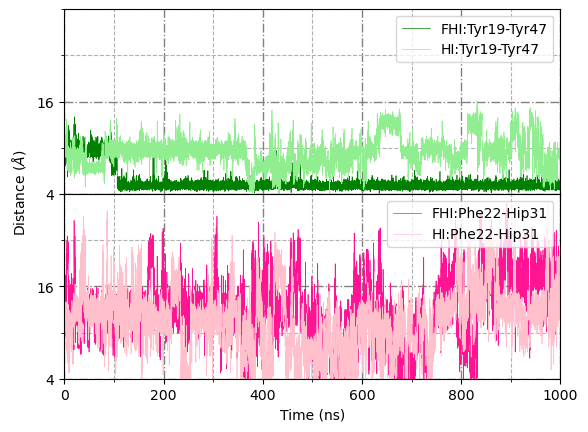

In [178]:
figure(figsize=(16, 12), dpi=80)
fig, ax = plt.subplots(2)
fig.subplots_adjust(hspace=0)
ax[0].grid(color='grey', linestyle='-.', linewidth='1.0')
ax[1].grid(color='grey', linestyle='-.', linewidth='1.0')

plt.xlabel('Time (ns)')
ax[0].set_xlim(0,1000)
ax[0].set_ylim(4,28)
ax[1].set_xlim(0,1000)
ax[1].set_ylim(4,28)


fig.text(0.04, 0.5, 'Distance ($\AA$)', va='center', rotation='vertical')
ax[0].set_xticklabels([])
ax[1].set_xticks(np.arange(0, 1200, 200))
ax[0].set_yticks(np.arange(4, 28, 12))
ax[1].set_yticks(np.arange(4, 28, 12))

ax[0].grid(True)
ax[1].grid(True)

minor_locator = AutoMinorLocator(2)
ax[0].yaxis.set_minor_locator(minor_locator)
ax[1].yaxis.set_minor_locator(minor_locator)

ax[0].xaxis.set_minor_locator(MultipleLocator(100))
ax[1].xaxis.set_minor_locator(MultipleLocator(100))


ax[0].grid(visible=True, which='minor', linestyle='--')
ax[1].grid(visible=True, which='minor', linestyle='--')

ax[0].plot(time_data,dist_data3,ls='solid',linewidth='0.5',color='green')
ax[0].plot(time_data_hi,dist_data3_hi,ls='solid',linewidth='0.5',color='lightgreen')
ax[1].plot(time_data,dist_data4,ls='solid',linewidth='0.5',color='deeppink')
ax[1].plot(time_data_hi,dist_data4_hi,ls='solid',linewidth='0.5',color='pink')
#ax[4].plot(time_data,dist_data5,ls='solid',linewidth='0.5',color='red')
#ax[4].plot(time_data_hi,dist_data5_hi,ls='solid',linewidth='0.5',color='red')
#ax[5].plot(time_data,dist_data6,ls='solid',linewidth='0.5',color='blue')
#ax[5].plot(time_data_hi,dist_data6_hi,ls='solid',linewidth='0.5',color='blue')
#ax[6].plot(time_data,dist_data7,ls='solid',linewidth='0.5',color='green')
#ax[6].plot(time_data_hi,dist_data7_hi,ls='solid',linewidth='0.5',color='green')
#ax[7].plot(time_data,dist_data8,ls='solid',linewidth='0.5',color='deeppink')
#ax[7].plot(time_data_hi,dist_data8_hi,ls='solid',linewidth='0.5',color='deeppink')
#ax[8].plot(time_data,dist_data9,ls='solid',linewidth='0.5',color='red')
#ax[8].plot(time_data_hi,dist_data9_hi,ls='solid',linewidth='0.5',color='red')
#ax[9].plot(time_data,dist_data10,ls='solid',linewidth='0.5',color='blue')
#ax[10].plot(time_data,dist_data11,ls='solid',linewidth='0.5',color='green')
#ax[11].plot(time_data,dist_data12,ls='solid',linewidth='0.5',color='deeppink')


ax[0].legend(['FHI:Tyr19-Tyr47','HI:Tyr19-Tyr47'],loc='upper right')
ax[1].legend(['FHI:Phe22-Hip31','HI:Phe22-Hip31'],loc='upper right')
#ax[4].legend(['FHI:Hip26-Phe22','HI:Hip26-Phe22'],loc='upper right')
#ax[5].legend(['FHI:Hip26-Hip31','HI:Hip26-Hip31'],loc='upper right')
#ax[6].legend(['FHI:Hip31-Tyr19','HI:Hip31-Tyr19'],loc='upper right')
#ax[7].legend(['FHI:Hip31-Tyr47','HI:Hip31-Tyr47'],loc='upper right')
#ax[8].legend(['FHI:Tyr37-Phe45','HI:Tyr37-Phe45'],loc='upper right')
#ax[9].legend(['FHI:Phe45-Fhi50'],loc='upper right')
#ax[10].legend(['FHI:Fhi50-Tyr19'],loc='upper right')
#ax[11].legend(['FHI:Tyr47-Fhi50'],loc='upper right')

# I have commented the below line just because I don't want to modify the existing images.
plt.savefig('pi1.jpg', bbox_inches='tight', transparent=True, dpi=600) 

<Figure size 1280x960 with 0 Axes>

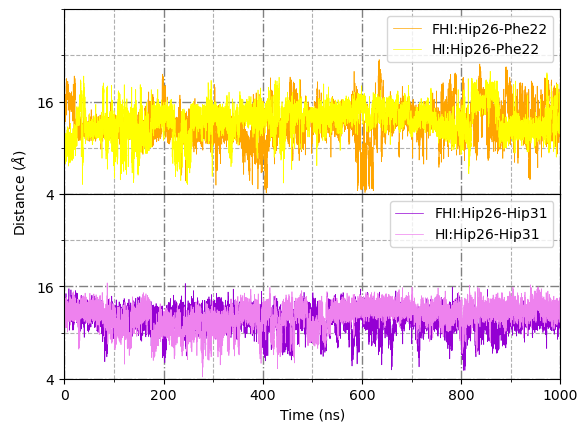

In [180]:
figure(figsize=(16, 12), dpi=80)
fig, ax = plt.subplots(2)
fig.subplots_adjust(hspace=0)
ax[0].grid(color='grey', linestyle='-.', linewidth='1.0')
ax[1].grid(color='grey', linestyle='-.', linewidth='1.0')

plt.xlabel('Time (ns)')
ax[0].set_xlim(0,1000)
ax[0].set_ylim(4,28)
ax[1].set_xlim(0,1000)
ax[1].set_ylim(4,28)


fig.text(0.04, 0.5, 'Distance ($\AA$)', va='center', rotation='vertical')
ax[0].set_xticklabels([])
ax[1].set_xticks(np.arange(0, 1200, 200))
ax[0].set_yticks(np.arange(4, 28, 12))
ax[1].set_yticks(np.arange(4, 28, 12))

ax[0].grid(True)
ax[1].grid(True)

minor_locator = AutoMinorLocator(2)
ax[0].yaxis.set_minor_locator(minor_locator)
ax[1].yaxis.set_minor_locator(minor_locator)

ax[0].xaxis.set_minor_locator(MultipleLocator(100))
ax[1].xaxis.set_minor_locator(MultipleLocator(100))


ax[0].grid(visible=True, which='minor', linestyle='--')
ax[1].grid(visible=True, which='minor', linestyle='--')

ax[0].plot(time_data,dist_data5,ls='solid',linewidth='0.5',color='orange')
ax[0].plot(time_data_hi,dist_data5_hi,ls='solid',linewidth='0.5',color='yellow')
ax[1].plot(time_data,dist_data6,ls='solid',linewidth='0.5',color='darkviolet')
ax[1].plot(time_data_hi,dist_data6_hi,ls='solid',linewidth='0.5',color='violet')
#ax[6].plot(time_data,dist_data7,ls='solid',linewidth='0.5',color='green')
#ax[6].plot(time_data_hi,dist_data7_hi,ls='solid',linewidth='0.5',color='green')
#ax[7].plot(time_data,dist_data8,ls='solid',linewidth='0.5',color='deeppink')
#ax[7].plot(time_data_hi,dist_data8_hi,ls='solid',linewidth='0.5',color='deeppink')
#ax[8].plot(time_data,dist_data9,ls='solid',linewidth='0.5',color='red')
#ax[8].plot(time_data_hi,dist_data9_hi,ls='solid',linewidth='0.5',color='red')
#ax[9].plot(time_data,dist_data10,ls='solid',linewidth='0.5',color='blue')
#ax[10].plot(time_data,dist_data11,ls='solid',linewidth='0.5',color='green')
#ax[11].plot(time_data,dist_data12,ls='solid',linewidth='0.5',color='deeppink')

ax[0].legend(['FHI:Hip26-Phe22','HI:Hip26-Phe22'],loc='upper right')
ax[1].legend(['FHI:Hip26-Hip31','HI:Hip26-Hip31'],loc='upper right')
#ax[6].legend(['FHI:Hip31-Tyr19','HI:Hip31-Tyr19'],loc='upper right')
#ax[7].legend(['FHI:Hip31-Tyr47','HI:Hip31-Tyr47'],loc='upper right')
#ax[8].legend(['FHI:Tyr37-Phe45','HI:Tyr37-Phe45'],loc='upper right')
#ax[9].legend(['FHI:Phe45-Fhi50'],loc='upper right')
#ax[10].legend(['FHI:Fhi50-Tyr19'],loc='upper right')
#ax[11].legend(['FHI:Tyr47-Fhi50'],loc='upper right')

# I have commented the below line just because I don't want to modify the existing images.
plt.savefig('pi2.jpg', bbox_inches='tight', transparent=True, dpi=600) 

<Figure size 1280x960 with 0 Axes>

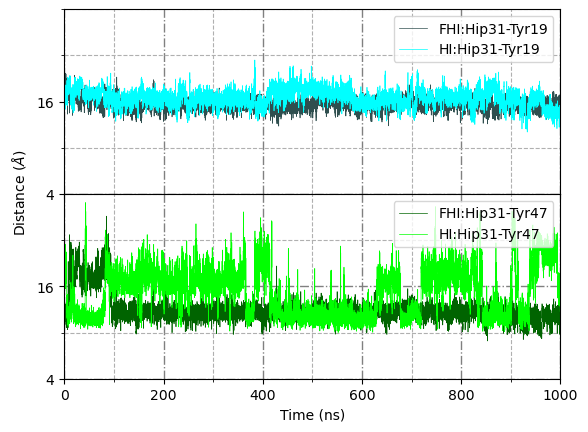

In [185]:
figure(figsize=(16, 12), dpi=80)
fig, ax = plt.subplots(2)
fig.subplots_adjust(hspace=0)
ax[0].grid(color='grey', linestyle='-.', linewidth='1.0')
ax[1].grid(color='grey', linestyle='-.', linewidth='1.0')

plt.xlabel('Time (ns)')
ax[0].set_xlim(0,1000)
ax[0].set_ylim(4,28)
ax[1].set_xlim(0,1000)
ax[1].set_ylim(4,28)


fig.text(0.04, 0.5, 'Distance ($\AA$)', va='center', rotation='vertical')
ax[0].set_xticklabels([])
ax[1].set_xticks(np.arange(0, 1200, 200))
ax[0].set_yticks(np.arange(4, 28, 12))
ax[1].set_yticks(np.arange(4, 28, 12))

ax[0].grid(True)
ax[1].grid(True)

minor_locator = AutoMinorLocator(2)
ax[0].yaxis.set_minor_locator(minor_locator)
ax[1].yaxis.set_minor_locator(minor_locator)

ax[0].xaxis.set_minor_locator(MultipleLocator(100))
ax[1].xaxis.set_minor_locator(MultipleLocator(100))


ax[0].grid(visible=True, which='minor', linestyle='--')
ax[1].grid(visible=True, which='minor', linestyle='--')

ax[0].plot(time_data,dist_data7,ls='solid',linewidth='0.5',color='darkslategray')
ax[0].plot(time_data_hi,dist_data7_hi,ls='solid',linewidth='0.5',color='cyan')
ax[1].plot(time_data,dist_data8,ls='solid',linewidth='0.5',color='darkgreen')
ax[1].plot(time_data_hi,dist_data8_hi,ls='solid',linewidth='0.5',color='lime')
#ax[8].plot(time_data,dist_data9,ls='solid',linewidth='0.5',color='red')
#ax[8].plot(time_data_hi,dist_data9_hi,ls='solid',linewidth='0.5',color='red')
#ax[9].plot(time_data,dist_data10,ls='solid',linewidth='0.5',color='blue')
#ax[10].plot(time_data,dist_data11,ls='solid',linewidth='0.5',color='green')
#ax[11].plot(time_data,dist_data12,ls='solid',linewidth='0.5',color='deeppink')

ax[0].legend(['FHI:Hip31-Tyr19','HI:Hip31-Tyr19'],loc='upper right')
ax[1].legend(['FHI:Hip31-Tyr47','HI:Hip31-Tyr47'],loc='upper right')
#ax[8].legend(['FHI:Tyr37-Phe45','HI:Tyr37-Phe45'],loc='upper right')
#ax[9].legend(['FHI:Phe45-Fhi50'],loc='upper right')
#ax[10].legend(['FHI:Fhi50-Tyr19'],loc='upper right')
#ax[11].legend(['FHI:Tyr47-Fhi50'],loc='upper right')

# I have commented the below line just because I don't want to modify the existing images.
plt.savefig('pi3.jpg', bbox_inches='tight', transparent=True, dpi=600) 

<Figure size 1280x960 with 0 Axes>

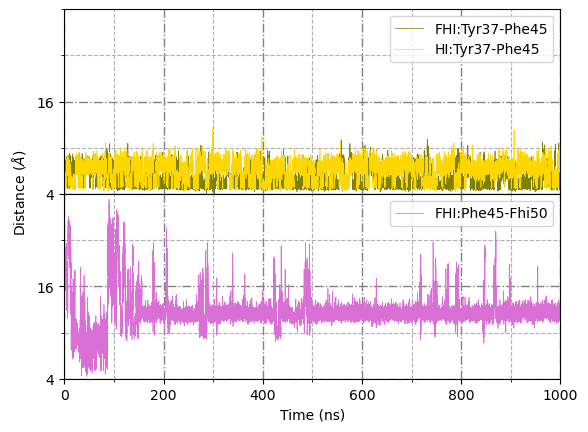

In [186]:
figure(figsize=(16, 12), dpi=80)
fig, ax = plt.subplots(2)
fig.subplots_adjust(hspace=0)
ax[0].grid(color='grey', linestyle='-.', linewidth='1.0')
ax[1].grid(color='grey', linestyle='-.', linewidth='1.0')

plt.xlabel('Time (ns)')
ax[0].set_xlim(0,1000)
ax[0].set_ylim(4,28)
ax[1].set_xlim(0,1000)
ax[1].set_ylim(4,28)


fig.text(0.04, 0.5, 'Distance ($\AA$)', va='center', rotation='vertical')
ax[0].set_xticklabels([])
ax[1].set_xticks(np.arange(0, 1200, 200))
ax[0].set_yticks(np.arange(4, 28, 12))
ax[1].set_yticks(np.arange(4, 28, 12))

ax[0].grid(True)
ax[1].grid(True)

minor_locator = AutoMinorLocator(2)
ax[0].yaxis.set_minor_locator(minor_locator)
ax[1].yaxis.set_minor_locator(minor_locator)

ax[0].xaxis.set_minor_locator(MultipleLocator(100))
ax[1].xaxis.set_minor_locator(MultipleLocator(100))


ax[0].grid(visible=True, which='minor', linestyle='--')
ax[1].grid(visible=True, which='minor', linestyle='--')

ax[0].plot(time_data,dist_data9,ls='solid',linewidth='0.5',color='olive')
ax[0].plot(time_data_hi,dist_data9_hi,ls='solid',linewidth='0.5',color='gold')
ax[1].plot(time_data,dist_data10,ls='solid',linewidth='0.5',color='orchid')
#ax[10].plot(time_data,dist_data11,ls='solid',linewidth='0.5',color='green')
#ax[11].plot(time_data,dist_data12,ls='solid',linewidth='0.5',color='deeppink')

ax[0].legend(['FHI:Tyr37-Phe45','HI:Tyr37-Phe45'],loc='upper right')
ax[1].legend(['FHI:Phe45-Fhi50'],loc='upper right')
#ax[10].legend(['FHI:Fhi50-Tyr19'],loc='upper right')
#ax[11].legend(['FHI:Tyr47-Fhi50'],loc='upper right')

# I have commented the below line just because I don't want to modify the existing images.
plt.savefig('pi4.jpg', bbox_inches='tight', transparent=True, dpi=600) 

<Figure size 1280x960 with 0 Axes>

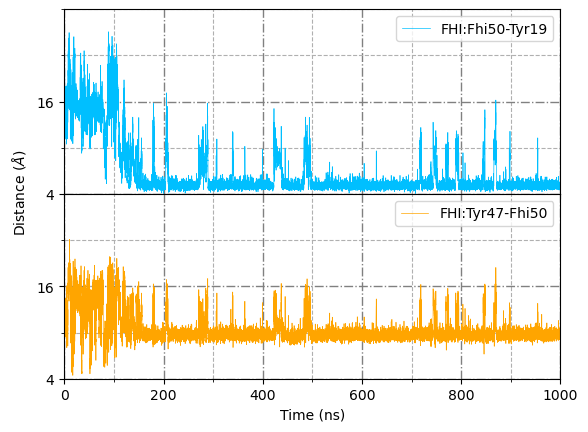

In [187]:
figure(figsize=(16, 12), dpi=80)
fig, ax = plt.subplots(2)
fig.subplots_adjust(hspace=0)
ax[0].grid(color='grey', linestyle='-.', linewidth='1.0')
ax[1].grid(color='grey', linestyle='-.', linewidth='1.0')

plt.xlabel('Time (ns)')
ax[0].set_xlim(0,1000)
ax[0].set_ylim(4,28)
ax[1].set_xlim(0,1000)
ax[1].set_ylim(4,28)


fig.text(0.04, 0.5, 'Distance ($\AA$)', va='center', rotation='vertical')
ax[0].set_xticklabels([])
ax[1].set_xticks(np.arange(0, 1200, 200))
ax[0].set_yticks(np.arange(4, 28, 12))
ax[1].set_yticks(np.arange(4, 28, 12))

ax[0].grid(True)
ax[1].grid(True)

minor_locator = AutoMinorLocator(2)
ax[0].yaxis.set_minor_locator(minor_locator)
ax[1].yaxis.set_minor_locator(minor_locator)

ax[0].xaxis.set_minor_locator(MultipleLocator(100))
ax[1].xaxis.set_minor_locator(MultipleLocator(100))


ax[0].grid(visible=True, which='minor', linestyle='--')
ax[1].grid(visible=True, which='minor', linestyle='--')

ax[0].plot(time_data,dist_data11,ls='solid',linewidth='0.5',color='deepskyblue')
ax[1].plot(time_data,dist_data12,ls='solid',linewidth='0.5',color='orange')

ax[0].legend(['FHI:Fhi50-Tyr19'],loc='upper right')
ax[1].legend(['FHI:Tyr47-Fhi50'],loc='upper right')

# I have commented the below line just because I don't want to modify the existing images.
plt.savefig('pi5.jpg', bbox_inches='tight', transparent=True, dpi=600) 

In [1]:
import numpy as np

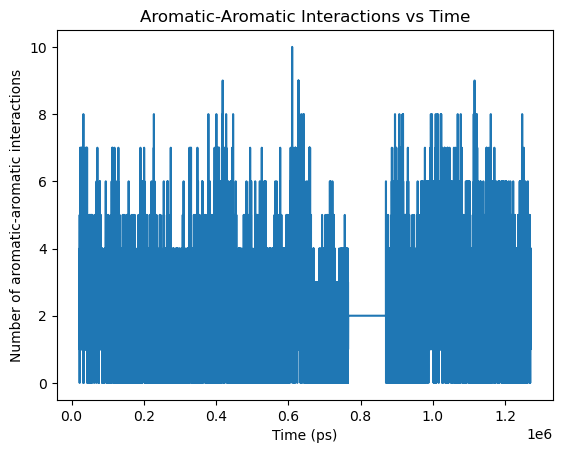

CPU times: user 37min 44s, sys: 7.37 s, total: 37min 51s
Wall time: 38min 25s


In [183]:
%%time
import mdtraj as md
import numpy as np

# Load trajectory and topology files
#Convert .nc file to .h5 file in terminal
# mdconvert -o center.h5 -s 1 -t solvated_2jv1.prmtop center1.nc
t=md.load('data1/center.h5', top='solvated_2jv1.prmtop')
t.superpose(t, 0)

# Define distance and angle cutoffs for aromatic-aromatic interactions
distance_cutoff_min = 4.5  # Angstroms
distance_cutoff_max = 7.0  # Angstroms
dihedral_angle_min = 30.0  # Degrees
dihedral_angle_max = 90.0  # Degrees

# Initialize an empty list to store the number of aromatic-aromatic interactions for each frame
aromatic_aromatic_interactions = []

# Define aromatic residue names and corresponding atom types for centroid calculation
aromatic_residues = {
    'PHE': ['CG', 'CD1', 'CD2', 'CE1', 'CE2', 'CZ'],
    'TYR': ['CG', 'CD1', 'CD2', 'CE1', 'CE2', 'CZ'],
    'FHI': ['CK', 'CL1', 'CM2', 'CM1', 'CL2', 'CN'],
    'HIP': ['CG', 'ND1', 'CD2', 'CE1', 'ND2']
}

# Loop over trajectory frames
for frame in t:
    # Convert generator object to a list of residues
    residues = list(frame.topology.residues)
    
    # Initialize counter for this frame
    interactions_this_frame = 0
    
    # Loop over residues
    for i, residue_i in enumerate(residues):
        # Check if the residue name is in the list of aromatic residue names
        if residue_i.name in aromatic_residues:
            # Convert residue_i.atoms iterator to a list
            atoms_i = list(residue_i.atoms)
            
            # Loop over other aromatic residues
            for residue_j in residues[i+1:]:
                if residue_j.name in aromatic_residues:
                    # Convert residue_j.atoms iterator to a list
                    atoms_j = list(residue_j.atoms)
                    
                    # Calculate the distance between the centroids of aromatic rings
                    centroid_i = np.mean(frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :], axis=0)
                    centroid_j = np.mean(frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :], axis=0)
                    distance = np.linalg.norm(centroid_i - centroid_j)
                    
                    # Calculate the dihedral angle between the planes of the aromatic rings
                    plane_i = np.cross(frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :][:, 0, :] - frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :][:, 1, :],
                                       frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :][:, 0, :] - frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :][:, 2, :])
                    plane_j = np.cross(frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :][:, 0, :] - frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :][:, 1, :],
                                       frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :][:, 0, :] - frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :][:, 2, :])

                    # Reshape planes to have compatible shapes
                    plane_i = plane_i.reshape(1, -1)
                    plane_j = plane_j.reshape(1, -1)

                    angle = np.arccos(np.dot(plane_i, plane_j.T) / (np.linalg.norm(plane_i) * np.linalg.norm(plane_j)))
                    angle = np.degrees(angle)
                   
                    # Check if criteria are met for aromatic-aromatic interaction
                    if distance >= distance_cutoff_min and distance <= distance_cutoff_max and \
                       angle >= dihedral_angle_min and angle <= dihedral_angle_max:
                        interactions_this_frame += 1
    
    # Append number of interactions for this frame to the list
    aromatic_aromatic_interactions.append(interactions_this_frame)

# Plot the total number of aromatic-aromatic interactions versus time
import matplotlib.pyplot as plt
plt.plot(t.time, aromatic_aromatic_interactions)
plt.xlabel('Time (ps)')
plt.ylabel('Number of aromatic-aromatic interactions')
plt.title('Aromatic-Aromatic Interactions vs Time')
plt.show()


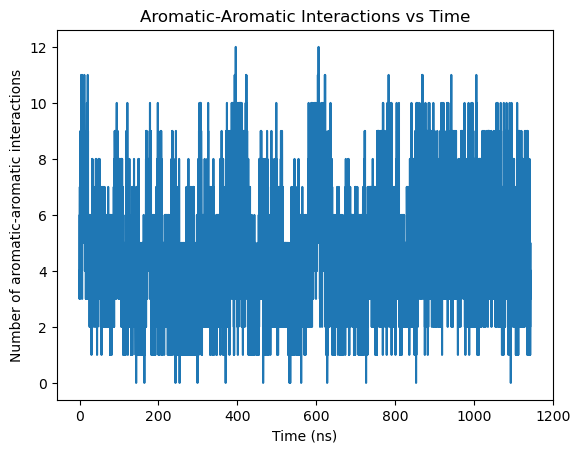

CPU times: user 29min 36s, sys: 868 ms, total: 29min 37s
Wall time: 29min 38s


In [15]:
%%time
import mdtraj as md
import numpy as np

# Load trajectory and topology files
#Convert .nc file to .h5 file in terminal
# mdconvert -o center.h5 -s 1 -t solvated_2jv1.prmtop center1.nc
#t=md.load('data1/center.h5', top='solvated_2jv1.prmtop')
#t.superpose(t, 0)

# Define distance and angle cutoffs for aromatic-aromatic interactions
distance_cutoff_min = 4.5  # Angstroms
distance_cutoff_max = 7.0  # Angstroms
dihedral_angle_min = 30.0  # Degrees
dihedral_angle_max = 90.0  # Degrees

# Initialize an empty list to store the number of aromatic-aromatic interactions for each frame
aromatic_aromatic_interactions = []

# Define aromatic residue names and corresponding atom types for centroid calculation
aromatic_residues = {
    'PHE': ['CG', 'CD1', 'CD2', 'CE1', 'CE2', 'CZ'],
    'TYR': ['CG', 'CD1', 'CD2', 'CE1', 'CE2', 'CZ'],
    'FHI': ['CK', 'CL1', 'CM2', 'CM1', 'CL2', 'CN'],
    'HIP': ['CG', 'ND1', 'CD2', 'CE1', 'ND2']
}

# Loop over trajectory frames
for frame in t:
    # Convert generator object to a list of residues
    residues = list(frame.topology.residues)
    
    # Initialize counter for this frame
    interactions_this_frame = 0
    
    # Loop over residues
    for i, residue_i in enumerate(residues):
        # Check if the residue name is in the list of aromatic residue names
        if residue_i.name in aromatic_residues:
            # Convert residue_i.atoms iterator to a list
            atoms_i = list(residue_i.atoms)
            
            # Loop over other aromatic residues
            for residue_j in residues[i+1:]:
                if residue_j.name in aromatic_residues:
                    # Convert residue_j.atoms iterator to a list
                    atoms_j = list(residue_j.atoms)
                    
                    # Calculate the distance between the centroids of aromatic rings
                    centroid_i = np.mean(frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :], axis=0)
                    centroid_j = np.mean(frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :], axis=0)
                    distance = np.linalg.norm(centroid_i - centroid_j)
                    
                    # Calculate the dihedral angle between the planes of the aromatic rings
                    plane_i = np.cross(frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :][:, 0, :] - frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :][:, 1, :],
                                       frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :][:, 0, :] - frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :][:, 2, :])
                    plane_j = np.cross(frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :][:, 0, :] - frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :][:, 1, :],
                                       frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :][:, 0, :] - frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :][:, 2, :])

                    # Reshape planes to have compatible shapes
                    plane_i = plane_i.reshape(1, -1)
                    plane_j = plane_j.reshape(1, -1)

                    angle = np.arccos(np.dot(plane_i, plane_j.T) / (np.linalg.norm(plane_i) * np.linalg.norm(plane_j)))
                    angle = np.degrees(angle)
                    if angle>90:
                        angle=abs(180-angle)
                                            
                    # Check if criteria are met for aromatic-aromatic interaction
                    if distance >= distance_cutoff_min and distance <= distance_cutoff_max and \
                       angle >= dihedral_angle_min and angle <= dihedral_angle_max:
                        interactions_this_frame += 1
    
    # Append number of interactions for this frame to the list
    aromatic_aromatic_interactions.append(interactions_this_frame)

# Plot the total number of aromatic-aromatic interactions versus time
import matplotlib.pyplot as plt
frame_number = np.arange(len(aromatic_aromatic_interactions)) / 20

# Plot against the number of frames divided by 20
plt.plot(frame_number,aromatic_aromatic_interactions)
plt.xlabel('Time (ns)')
plt.ylabel('Number of aromatic-aromatic interactions')
plt.title('Aromatic-Aromatic Interactions vs Time')
plt.show()

/home/shivaniv/anaconda3/lib/python3.11/site-packages/mdtraj/core/trajectory.py:439: UserWarning: top= kwargs ignored since this file parser does not support it
  warnings.warn('top= kwargs ignored since this file parser does not support it')


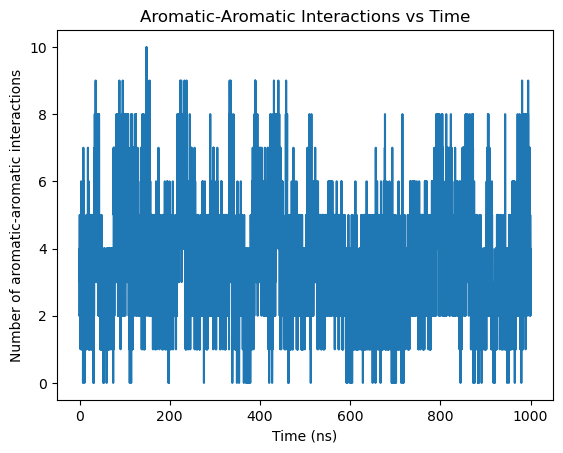

CPU times: user 22min 54s, sys: 3.52 s, total: 22min 58s
Wall time: 23min 11s


In [17]:
%%time
import mdtraj as md
import numpy as np

# Load trajectory and topology files
#Convert .nc file to .h5 file in terminal
t_hi=md.load('../hi/data/center.h5', top='../hi/data/solvated_2jv1.prmtop')
t_hi.superpose(t_hi, 0)

# Define distance and angle cutoffs for aromatic-aromatic interactions
distance_cutoff_min = 4.5  # Angstroms
distance_cutoff_max = 7.0  # Angstroms
dihedral_angle_min = 30.0  # Degrees
dihedral_angle_max = 90.0  # Degrees

# Initialize an empty list to store the number of aromatic-aromatic interactions for each frame
aromatic_aromatic_interactions_hi = []

# Define aromatic residue names and corresponding atom types for centroid calculation
aromatic_residues = {
    'PHE': ['CG', 'CD1', 'CD2', 'CE1', 'CE2', 'CZ'],
    'TYR': ['CG', 'CD1', 'CD2', 'CE1', 'CE2', 'CZ'],
    'FHI': ['CK', 'CL1', 'CM2', 'CM1', 'CL2', 'CN'],
    'HIP': ['CG', 'ND1', 'CD2', 'CE1', 'ND2']
}

# Loop over trajectory frames
for frame in t_hi:
    # Convert generator object to a list of residues
    residues = list(frame.topology.residues)
    
    # Initialize counter for this frame
    interactions_this_frame = 0
    
    # Loop over residues
    for i, residue_i in enumerate(residues):
        # Check if the residue name is in the list of aromatic residue names
        if residue_i.name in aromatic_residues:
            # Convert residue_i.atoms iterator to a list
            atoms_i = list(residue_i.atoms)
            
            # Loop over other aromatic residues
            for residue_j in residues[i+1:]:
                if residue_j.name in aromatic_residues:
                    # Convert residue_j.atoms iterator to a list
                    atoms_j = list(residue_j.atoms)
                    
                    # Calculate the distance between the centroids of aromatic rings
                    centroid_i = np.mean(frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :], axis=0)
                    centroid_j = np.mean(frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :], axis=0)
                    distance = np.linalg.norm(centroid_i - centroid_j)
                    
                    # Calculate the dihedral angle between the planes of the aromatic rings
                    plane_i = np.cross(frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :][:, 0, :] - frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :][:, 1, :],
                                       frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :][:, 0, :] - frame.xyz[:, [atom.index for atom in atoms_i if atom.name in aromatic_residues[residue_i.name]], :][:, 2, :])
                    plane_j = np.cross(frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :][:, 0, :] - frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :][:, 1, :],
                                       frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :][:, 0, :] - frame.xyz[:, [atom.index for atom in atoms_j if atom.name in aromatic_residues[residue_j.name]], :][:, 2, :])

                    # Reshape planes to have compatible shapes
                    plane_i = plane_i.reshape(1, -1)
                    plane_j = plane_j.reshape(1, -1)

                    angle = np.arccos(np.dot(plane_i, plane_j.T) / (np.linalg.norm(plane_i) * np.linalg.norm(plane_j)))
                    angle = np.degrees(angle)
                    angle = np.arccos(np.dot(plane_i, plane_j.T) / (np.linalg.norm(plane_i) * np.linalg.norm(plane_j)))
                    angle = np.degrees(angle)
                    if angle>90:
                        angle=abs(180-angle)
                        
                    # Check if criteria are met for aromatic-aromatic interaction
                    if distance >= distance_cutoff_min and distance <= distance_cutoff_max and \
                       angle >= dihedral_angle_min and angle <= dihedral_angle_max:
                        interactions_this_frame += 1
    
    # Append number of interactions for this frame to the list
    aromatic_aromatic_interactions_hi.append(interactions_this_frame)

# Plot the total number of aromatic-aromatic interactions versus time
import matplotlib.pyplot as plt
frame_number_hi = np.arange(len(aromatic_aromatic_interactions_hi)) / 20

# Plot against the number of frames divided by 20
plt.plot(frame_number_hi,aromatic_aromatic_interactions_hi)
#plt.plot(t_hi.time, aromatic_aromatic_interactions_hi)
plt.xlabel('Time (ns)')
plt.ylabel('Number of aromatic-aromatic interactions')
plt.title('Aromatic-Aromatic Interactions vs Time')
plt.show()

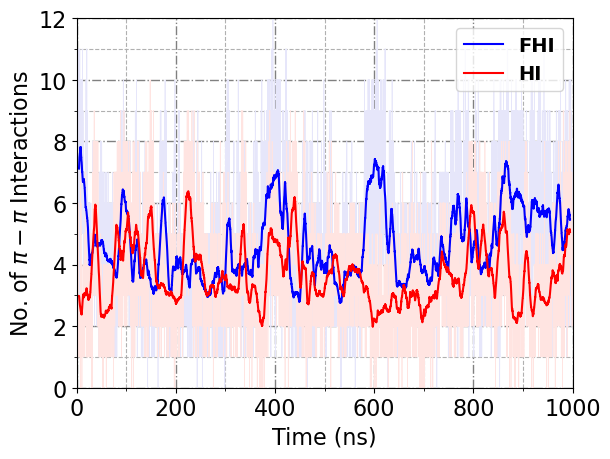

In [27]:
from __future__ import division
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
from pylab import plot, ylim, xlim, show, xlabel, ylabel, grid
from numpy import linspace, loadtxt, ones, convolve

def movingaverage(interval, window_size):
    window= np.ones(int(window_size))/float(window_size)
    return np.convolve(interval, window, 'same')

legend_properties = {'weight':'bold','size':'14'}
legend_drawn_flag = True
fig, ax = plt.subplots()

y_av = movingaverage(aromatic_aromatic_interactions, 200)
y1_av = movingaverage(aromatic_aromatic_interactions_hi, 200)

plt.xticks(np.arange(0, 1200, 200),fontsize=16)
plt.yticks(np.arange(0, 14, 2),fontsize=16)
ax.xaxis.grid(True, which='minor')
ax.xaxis.set_minor_locator(MultipleLocator(100))
ax.yaxis.set_minor_locator(MultipleLocator(1))
plt.grid(color='grey', linestyle='-.', linewidth='1.0')
plt.grid(visible=True, which='minor', linestyle='--')
# Plot against the number of frames divided by 20
plt.plot(frame_number,aromatic_aromatic_interactions,ls='solid',linewidth='0.5', color='lavender')
plt.plot(frame_number_hi,aromatic_aromatic_interactions_hi,ls='solid',linewidth='0.5', color='mistyrose')
plt.plot(frame_number[100:19900],y_av[100:19900],ls='solid', color='blue',label="FHI")
plt.plot(frame_number_hi[100:19900],y1_av[100:19900],ls='solid', color='red',label='HI')
plt.xlabel('Time (ns)',fontsize=16)
plt.ylabel('No. of $\pi-\pi$ Interactions',fontsize=16)
#plt.title('Aromatic-Aromatic Interactions vs Time')
plt.xlim(0,1000)
plt.ylim(0,12)
plt.legend(loc='upper right',frameon=legend_drawn_flag,prop=legend_properties)
#plt.show()
plt.savefig('aromatic_aromatic_interactions.jpg', bbox_inches='tight', transparent=True, dpi=600)